In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scipy
!pip install statsmodels

# Checking if Dataset is suitable

In [ ]:
from enum import unique
import pandas as pd

drive_path = "/content/drive/My Drive/SP+SM_project/Demographics_age_sex.xlsx"
df = pd.read_excel(drive_path)

unique_files = df['Sample ID'].nunique()
total_rows = len(df)

print(f"Number of unique files: {unique_files}")
print(f"Total number of rows: {total_rows}")

if unique_files == total_rows:
  print("Dataset is suitable")
else:
  print("The number of unique files does not match the number of rows. There might be duplicates or rows not corresponding to files.")

# Check the unique values in the 'condition' column
unique_conditions = df['Label'].unique()
print(f"Unique conditions: {unique_conditions}")

# Check if 'Healthy' and 'Parkinson' are present
if 'HC' in unique_conditions and 'PwPD' in unique_conditions:
    print("Speaker condition (Healthy or Parkinson) is labeled.")
else:
    print("The expected conditions ('Healthy' or 'Parkinson') were not found in the 'condition' column.")

# Optionally, view the value counts for each condition
print("\nValue counts for speaker conditions:")
print(df['Label'].value_counts())


Number of unique files: 81
Total number of rows: 81
Dataset is suitable
Unique conditions: ['HC' 'PwPD']
Speaker condition (Healthy or Parkinson) is labeled.

Value counts for speaker conditions:
Label
HC      41
PwPD    40
Name: count, dtype: int64


In [ ]:
import os  #for file paths.
import librosa #to load audio and get sample rate.
import pandas as pd #to store and analyze results.

drive_path = "/content/drive/My Drive/SP+SM_project"
folders = ['HC_AH', 'PD_AH']

# List to store file paths and sample rates
file_sample_rates = []

# Iterate through folders and files
for folder in folders:
    folder_path = os.path.join(drive_path, folder)
    if os.path.exists(folder_path): # Check if the folder exists
        for file in os.listdir(folder_path):
            if file.endswith(".wav"):
                file_path = os.path.join(folder_path, file)
                try:
                    # Load the file to get its sample rate
                    y, sr = librosa.load(file_path, sr=None)   #Load the audio with original sample rate (sr=None).Librosa will resample everything (by default to 22050 Hz).
                    file_sample_rates.append({'File Path': file_path, 'Sample Rate (Hz)': sr})
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
    else:
        print(f"Warning: Folder not found: {folder_path}")


# Create a pandas DataFrame
df_sample_rates = pd.DataFrame(file_sample_rates)    #Convert the list of dictionaries into a pandas DataFrame for analysis.
# Check the unique values in the 'Sample Rate (Hz)' column
unique_sample_rates = df_sample_rates['Sample Rate (Hz)'].unique()
print("\nUnique Sample Rates found:")
print(unique_sample_rates)

# If you want to see how many files have each sample rate, you can use value_counts()
print("\nCounts of each Sample Rate:")
print(df_sample_rates['Sample Rate (Hz)'].value_counts())



Unique Sample Rates found:
[8000]

Counts of each Sample Rate:
Sample Rate (Hz)
8000    81
Name: count, dtype: int64


Basic information about the audio files

In [ ]:
from scipy.io import wavfile  #readin he wa ile
import numpy as np # Import numpy for handling the data returned by wavfile
import os # Import the os module to handle file paths

# Assuming 'drive_path' is defined in a previous cell, e.g.:
# drive_path = "/content/drive/My Drive/SP+SM_project"

# Define the folder paths
healthy_folder_name = 'HC_AH'
parkinson_folder_name = 'PD_AH'

healthy_folder_path = os.path.join(drive_path, healthy_folder_name)
parkinson_folder_path = os.path.join(drive_path, parkinson_folder_name)

# List audio files in each folder (assuming they are .wav files)
healthy_audio_files = [f for f in os.listdir(healthy_folder_path) if f.endswith('.wav')]
parkinson_audio_files = [f for f in os.listdir(parkinson_folder_path) if f.endswith('.wav')]


# Function to fetch and print basic info for a list of files using scipy.io.wavfile
def fetch_and_print_basic_info_scipy(folder_path, file_list, group_name):
    print(f"--- Basic Information for {group_name} Files (using scipy.io.wavfile) ---")
    # Added a check to ensure file_list is not empty
    if not file_list:
        print(f"No .wav files found in {folder_path}")
        return

    for filename in file_list:
        filepath = os.path.join(folder_path, filename)
        try:
            # wavfile.read returns sampling rate and data
            rate, data = wavfile.read(filepath)

            n_frames = data.shape[0] # Number of frames is the number of samples
            frame_rate = rate
            # Check if data is mono or stereo
            n_channels = 1 if len(data.shape) == 1 else data.shape[1]

            # scipy.io.wavfile doesn't directly give sample width in bytes
            # We can infer an approximate bit depth from the data type
            dtype = data.dtype
            if dtype == np.int16:
                sample_width_bits = 16
            elif dtype == np.int32:
                sample_width_bits = 32
            elif dtype == np.uint8:
                sample_width_bits = 8
            # Added handling for float data types which can occur in WAV files
            elif dtype == np.float32:
                sample_width_bits = 32
            elif dtype == np.float64:
                sample_width_bits = 64
            else:
                sample_width_bits = f"unknown ({dtype})" # Include dtype for debugging

            # Added a check for frame_rate being zero to avoid division by zero
            duration = n_frames / frame_rate if frame_rate > 0 else 0.0
            file_size = os.path.getsize(filepath) # in bytes

            print(f"File: {filename}")
            print(f"  Size: {file_size} bytes")
            print(f"  Duration: {duration:.2f} seconds")
            print(f"  Sampling Rate: {frame_rate} Hz")
            print(f"  Bit Depth: {sample_width_bits} bits")
            print(f"  Channels: {n_channels}")
            print("  Audio Format: WAV (encoding inferred from data type)") # Less specific with scipy
            print("-" * 20) # Separator for each file
        except FileNotFoundError:
             print(f"File not found: {filename}")
        except Exception as e:
            print(f"Could not read file {filename}: {e}")


# Add a clear heading and division before processing Parkinson's files
print("\n" + "="*50)
print(" PROCESSING PARKINSON'S DISEASE (PwPD) FILES ")
print("="*50 + "\n")

# Fetch and print information for Parkinson files
fetch_and_print_basic_info_scipy(parkinson_folder_path, parkinson_audio_files, parkinson_folder_name)

# Add a clear heading and division before processing Healthy Control files
print("\n" + "="*50)
print(" PROCESSING HEALTHY CONTROL (HC) FILES ")
print("="*50 + "\n")

# Fetch and print information for Healthy Control files
fetch_and_print_basic_info_scipy(healthy_folder_path, healthy_audio_files, healthy_folder_name)


 PROCESSING PARKINSON'S DISEASE (PwPD) FILES 

--- Basic Information for PD_AH Files (using scipy.io.wavfile) ---
File: AH_545622718-C052AD58-5E6B-4ADC-855C-F76B66BAFA6E.wav
  Size: 54804 bytes
  Duration: 1.71 seconds
  Sampling Rate: 8000 Hz
  Bit Depth: 32 bits
  Channels: 1
  Audio Format: WAV (encoding inferred from data type)
--------------------
File: AH_545622722-3C79DA68-36BB-43A2-B29C-61AEF480E07E.wav
  Size: 152532 bytes
  Duration: 4.76 seconds
  Sampling Rate: 8000 Hz
  Bit Depth: 32 bits
  Channels: 1
  Audio Format: WAV (encoding inferred from data type)
--------------------
File: AH_545692315-C2972597-9AEC-4060-A186-F1F59340640C.wav
  Size: 164288 bytes
  Duration: 5.13 seconds
  Sampling Rate: 8000 Hz
  Bit Depth: 32 bits
  Channels: 1
  Audio Format: WAV (encoding inferred from data type)
--------------------
File: AH_545713221-1E77C030-4558-4A88-B1A2-6AB777ACAE61.wav
  Size: 72584 bytes
  Duration: 2.27 seconds
  Sampling Rate: 8000 Hz
  Bit Depth: 32 bits
  Channel

In [ ]:
import pandas as pd
from scipy.io import wavfile
import numpy as np
import os

def fetch_audio_metadata(folder_path, file_list, group_name):
    metadata_list = []

    for filename in file_list:
        filepath = os.path.join(folder_path, filename)
        try:
            rate, data = wavfile.read(filepath)
            n_frames = data.shape[0]
            frame_rate = rate
            n_channels = 1 if len(data.shape) == 1 else data.shape[1]

            dtype = data.dtype
            if dtype == np.int16:
                sample_width_bits = 16
            elif dtype == np.int32:
                sample_width_bits = 32
            elif dtype == np.uint8:
                sample_width_bits = 8
            elif dtype == np.float32:
                sample_width_bits = 32
            elif dtype == np.float64:
                sample_width_bits = 64
            else:
                sample_width_bits = f"unknown ({dtype})"

            duration = n_frames / frame_rate if frame_rate > 0 else 0.0
            file_size = os.path.getsize(filepath)

            metadata_list.append({
                "File Name": filename,
                "Group": group_name,
                "Size (bytes)": file_size,
                "Duration (sec)": round(duration, 2),
                "Sampling Rate (Hz)": frame_rate,
                "Bit Depth": sample_width_bits,
                "Channels": n_channels,
                "Audio Format": "WAV"
            })

        except Exception as e:
            metadata_list.append({
                "File Name": filename,
                "Group": group_name,
                "Error": str(e)
            })

    return metadata_list

# Run for both groups
hc_metadata = fetch_audio_metadata(healthy_folder_path, healthy_audio_files, "Healthy Control")
pd_metadata = fetch_audio_metadata(parkinson_folder_path, parkinson_audio_files, "Parkinson's Disease")

# Combine and create DataFrame
all_metadata = hc_metadata + pd_metadata
df_audio_info = pd.DataFrame(all_metadata)

# Display the DataFrame (if using Jupyter or Google Colab)
from IPython.display import display
display(df_audio_info)


,File Name,Group,Size (bytes),Duration (sec),Sampling Rate (Hz),Bit Depth,Channels,Audio Format
0,AH_264Z_593C20CD-0A54-4177-B031-26EE147080A3.wav,Healthy Control,133360,4.17,8000,32,1,WAV
1,AH_123G_559F0706-2238-447C-BA39-DB5933BA619D.wav,Healthy Control,91712,2.86,8000,32,1,WAV
2,AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav,Healthy Control,91844,2.87,8000,32,1,WAV
3,AH_222K_FC9D2763-1836-460B-954F-37F23D6CD81D.wav,Healthy Control,61720,1.93,8000,32,1,WAV
4,AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22.wav,Healthy Control,134816,4.21,8000,32,1,WAV
...,...,...,...,...,...,...,...,...
76,AH_545841227-5C77713A-66F1-49D0-BC8A-702C152E6...,Parkinson's Disease,48596,1.52,8000,32,1,WAV
77,AH_545880204-EE87D3E2-0D4C-4EAA-ACD7-C3F177AFF...,Parkinson's Disease,180252,5.63,8000,32,1,WAV
78,AH_545841223-24FB0419-5BAE-4F9C-8EBC-CD62DA659...,Parkinson's Disease,131008,4.09,8000,32,1,WAV
79,AH_545847410-D1BA3BB4-1F61-44CA-ACDE-455A8E97E...,Parkinson's Disease,79096,2.47,8000,32,1,WAV


channel 1 means audio files have 1 channel, it simply indicates they are monophonic recordings.

Single Audio Stream: A mono audio file contains a single stream of audio information. All the sound is recorded and played back through a single channel.

No Spatial Information: With a mono recording, there is no information about where sounds are positioned in a left-to-right or front-to-back soundstage. The sound will typically appear to come from a single point in space.

Simpler Recording/Playback: Mono recordings are simpler to capture (e.g., using a single microphone) and require less storage space compared to multi-channel audio.

| **Feature**     | **Insight**                                                                                 |
| --------------- | ------------------------------------------------------------------------------------------- |
| **Mono/Stereo** | Most speech recordings are mono. Stereo may need preprocessing (e.g., convert to mono).     |
| **Duration**    | Uniform durations make comparison easier. Uneven durations may require padding or trimming. |
| **Sample Rate** | Affects feature extraction quality (e.g., pitch, jitter). Typical values: 8000–16000 Hz.    |
| **Bit Depth**   | Higher bit depth provides better dynamic detail, which helps in shimmer/jitter detection.   |


# preprocessing

| Step            | What It Prepares You For                                                                                         |
| --------------- | ---------------------------------------------------------------------------------------------------------------- |
| Pre-emphasis    | Makes pitch detection more accurate by boosting high-frequency content                                           |
| Silence removal | Ensures pitch is only calculated from the **spoken part**, not background noise                                  |
| Uniform format  | Your final dataset is now **cleaned and ready** for consistent pitch analysis, MFCC, or other feature extraction |


In [ ]:
import os  #to navigate folders/files
import librosa  # Load and process audio
import numpy as np   # Perform mathematical operations (used for pre-emphasis)
import soundfile as sf  # Save processed audio files as .wav

# === CONFIG ===
drive_path = "/content/drive/My Drive/SP+SM_project"
folders = ['HC_AH', 'PD_AH']
output_path = os.path.join(drive_path, "preprocessed")  # Save cleaned files here
os.makedirs(output_path, exist_ok=True)

# === PARAMETERS ===
pre_emphasis_coeff = 0.97   # Used in pre-emphasis to boost high frequencies, which helps extract pitch more accurately
top_db_threshold = 20  # dB threshold for silence trimming. Everything below this volume is considered silence
target_sr = 6000  # Resample all audio files to this target sampling rate (Hz)

# === PROCESSING FUNCTION ===
def preprocess_audio(file_path, sr=target_sr):
    y, sr = librosa.load(file_path, sr=sr)  # Force resampling to target_sr (8000 Hz)

    # Step 1: Pre-emphasis
    y_preemph = np.append(y[0], y[1:] - pre_emphasis_coeff * y[:-1])

    # Step 2: Silence Removal (librosa's trim keeps non-silent segments)
    y_trimmed, _ = librosa.effects.trim(y_preemph, top_db=top_db_threshold)
    # Removes the start and end silence in the audio based on energy threshold (20 dB),
    # the "cleaned" speech-only part of the audio

    # Step 3: Normalization (Amplitude Scaling)
    if np.max(np.abs(y_trimmed)) > 0:
        y_normalized = y_trimmed / np.max(np.abs(y_trimmed))
    else:
        y_normalized = y_trimmed  # Edge case: silence-only signal

    return y_normalized, sr

# === MAIN LOOP ===
for folder in folders:
    folder_path = os.path.join(drive_path, folder)
    output_folder = os.path.join(output_path, folder)
    os.makedirs(output_folder, exist_ok=True)

    for file in os.listdir(folder_path):
        if file.endswith(".wav"):
            file_path = os.path.join(folder_path, file)
            try:
                y_processed, sr = preprocess_audio(file_path)

                # Save preprocessed audio
                out_path = os.path.join(output_folder, file)
                sf.write(out_path, y_processed, sr)
                print(f"Processed and saved: {out_path}")

            except Exception as e:
                print(f"Failed to process {file_path}: {e}")


Processed and saved: /content/drive/My Drive/SP+SM_project/preprocessed/HC_AH/AH_264Z_593C20CD-0A54-4177-B031-26EE147080A3.wav
Processed and saved: /content/drive/My Drive/SP+SM_project/preprocessed/HC_AH/AH_123G_559F0706-2238-447C-BA39-DB5933BA619D.wav
Processed and saved: /content/drive/My Drive/SP+SM_project/preprocessed/HC_AH/AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav
Processed and saved: /content/drive/My Drive/SP+SM_project/preprocessed/HC_AH/AH_222K_FC9D2763-1836-460B-954F-37F23D6CD81D.wav
Processed and saved: /content/drive/My Drive/SP+SM_project/preprocessed/HC_AH/AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22.wav
Processed and saved: /content/drive/My Drive/SP+SM_project/preprocessed/HC_AH/AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav
Processed and saved: /content/drive/My Drive/SP+SM_project/preprocessed/HC_AH/AH_292J_201CB911-31C1-4CD0-BD73-4FBA4A16C21F.wav
Processed and saved: /content/drive/My Drive/SP+SM_project/preprocessed/HC_AH/AH_322A_C3BF5535-A11E-498E-94EB-B

Resampling to 8000 Hz

✅ Ensures uniform sampling rate across all files.

Pre-emphasis Filtering

✅ Enhances high-frequency components (important for pitch/jitter).

Silence Removal (Trimming)

✅ Removes non-informative silent regions, improving feature relevance.

# Feature Extraction (PITCH)
Extract frame-wise pitch values using librosa.yin() (a pitch detection algorithm YIN)

This function computes pitch values per frame (small segments of the signal).

| Parameter            | Meaning                                           |
| -------------------- | ------------------------------------------------- |
| `frame_length_ms=20` | Each frame is 20ms long                           |
| `frame_shift_ms=10`  | Shift 10ms at a time = 50% overlap                |
| `fmin`, `fmax`       | Pitch range to search (from \~65 Hz to \~2100 Hz) |


In [ ]:
!pip install praat-parselmouth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 76.3 MB/s eta 0:00:00


In [ ]:
# %% Feature Extraction (Pitch + Energy + Jitter + Shimmer + Percent Voiced + Pitch Slope)
import os #o naiae o ile
import librosa #loadin he audio
import numpy as np
import pandas as pd
import soundfile as sf  #eadin or wriin audioa

# === Paths ===
drive_path = "/content/drive/My Drive/SP+SM_project/preprocessed"
output_path = "/content/drive/My Drive/SP+SM_project/PITCH_CSVs"
os.makedirs(output_path, exist_ok=True)

folders = ['HC_AH', 'PD_AH']

# === Function to Extract Frame-wise Pitch ===
def extract_pitch_frames(y, sr, frame_length_ms=20, frame_shift_ms=10, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7')):
    frame_length = int(sr * frame_length_ms / 1000)
    hop_length = int(sr * frame_shift_ms / 1000)
    pitches, _, _ = librosa.pyin(y, fmin=fmin, fmax=fmax, sr=sr, frame_length=frame_length, hop_length=hop_length)
    pitch_frames = pitches.reshape(-1, 1)
    return pitch_frames, frame_length, hop_length

# === Function to compute Jitter and Shimmer ===
def compute_jitter_shimmer(y, sr):
    try:
        amplitude_threshold = np.mean(np.abs(y)) * 0.1
        voiced_indices = np.where(np.abs(y) > amplitude_threshold)[0]

        if len(voiced_indices) < sr * 0.1:
            return 0.0, 0.0

        voiced_y = y[voiced_indices]
        zero_crossings_in_voiced = librosa.zero_crossings(voiced_y, pad=False)
        zc_times_in_voiced = librosa.times_like(voiced_y, sr=sr)[zero_crossings_in_voiced]

        if len(zc_times_in_voiced) > 1:
            period_estimates = np.diff(zc_times_in_voiced)
            jitter = np.mean(np.abs(np.diff(period_estimates))) if len(period_estimates) > 1 else 0.0
        else:
            jitter = 0.0

        amplitudes_in_voiced = np.abs(voiced_y)
        shimmer = np.mean(np.abs(np.diff(amplitudes_in_voiced))) if len(amplitudes_in_voiced) > 1 else 0.0

        return float(jitter), float(shimmer)

    except Exception as e:
        print(f"Error computing jitter/shimmer: {e}")
        return 0.0, 0.0

# === Save CSVs and Collect Global Features ===
global_features_list = []

for folder in folders:
    folder_path = os.path.join(drive_path, folder)
    save_folder = os.path.join(output_path, folder)
    os.makedirs(save_folder, exist_ok=True)

    if not os.path.exists(folder_path):
        print(f"Warning: Input folder not found: {folder_path}. Skipping.")
        continue

    print(f"Processing folder: {folder}")
    files_in_folder = [f for f in os.listdir(folder_path) if f.endswith(".wav")]
    file_iterator = files_in_folder

    for file in file_iterator:
        file_path = os.path.join(folder_path, file)
        try:
            y, sr = librosa.load(file_path, sr=None)

            # Extract pitch features
            pitch_matrix, frame_length, hop_length = extract_pitch_frames(y, sr)

            # Pitch statistics
            pitch_values = pitch_matrix.flatten()
            voiced_pitches = pitch_values[pitch_values > 0]

            if len(voiced_pitches) > 0:
                pitch_range = np.max(voiced_pitches) - np.min(voiced_pitches)
                pitch_std_dev = np.std(voiced_pitches)
                pitch_mean = np.mean(voiced_pitches)
                pitch_median = np.median(voiced_pitches)
            else:
                pitch_range = pitch_std_dev = pitch_mean = pitch_median = 0.0

            # Extract RMS energy
            if y.ndim == 0:
                y = np.array([0.0])
            try:
                rms_energy = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
                energy_mean = np.mean(rms_energy) if len(rms_energy) > 0 else 0.0
                energy_std = np.std(rms_energy) if len(rms_energy) > 0 else 0.0
                energy_max = np.max(rms_energy) if len(rms_energy) > 0 else 0.0
            except Exception as rms_error:
                print(f"Error calculating RMS for {file_path}: {rms_error}")
                energy_mean = energy_std = energy_max = 0.0

            # Compute Jitter and Shimmer
            jitter, shimmer = compute_jitter_shimmer(y, sr)

            # === New Features: percent_voiced, pitch_slope, voiced_duration ===
            try:
                pitches_full, voiced_flags, _ = librosa.pyin(
                    y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'),
                    sr=sr, frame_length=frame_length, hop_length=hop_length
                )
                total_frames = len(voiced_flags)
                num_voiced_frames = np.sum(voiced_flags)
                percent_voiced = (num_voiced_frames / total_frames) * 100 if total_frames > 0 else 0.0
                voiced_duration = (num_voiced_frames * hop_length) / sr if sr > 0 else 0.0

                voiced_pitch_values = pitches_full[voiced_flags]
                if len(voiced_pitch_values) > 1:
                    time_axis = np.arange(len(voiced_pitch_values)) * hop_length / sr
                    slope = np.polyfit(time_axis, voiced_pitch_values, 1)[0]
                else:
                    slope = 0.0
            except Exception as extra_error:
                print(f"Error computing voicing/slope for {file_path}: {extra_error}")
                percent_voiced = slope = voiced_duration = 0.0

            # Label: 0=HC_AH, 1=PD_AH
            label = 0 if folder == 'HC_AH' else 1

            # Store features
            global_features_list.append({
                "filename": file,
                "label": label,
                "pitch_range": float(pitch_range),
                "pitch_std_dev": float(pitch_std_dev),
                "pitch_mean": float(pitch_mean),
                "pitch_median": float(pitch_median),
                "energy_mean": float(energy_mean),
                "energy_std": float(energy_std),
                "energy_max": float(energy_max),
                "jitter": float(jitter),
                "shimmer": float(shimmer),
                "percent_voiced": float(percent_voiced),
                "voiced_duration": float(voiced_duration),
                "pitch_slope": float(slope)
            })

            # Save pitch matrix to CSV
            if pitch_matrix is not None and pitch_matrix.shape[0] > 0:
                df_pitch_matrix = pd.DataFrame(pitch_matrix)
                out_csv_path = os.path.join(save_folder, file.replace(".wav", ".csv"))
                df_pitch_matrix.to_csv(out_csv_path, index=False, header=False)

        except Exception as e:
            print(f"Error processing {file_path}: {e}")

# Save global features
df_global_features = pd.DataFrame(global_features_list)
global_features_output_path = os.path.join("/content/drive/My Drive/SP+SM_project", "global_pitch_energy_features.csv")
df_global_features.to_csv(global_features_output_path, index=False)
print(f"\nSaved global features to: {global_features_output_path}")


Processing folder: HC_AH


<ipython-input-9-4114900874>:19: UserWarning: With fmin=65.406, sr=6000 and frame_length=120, less than two periods of fmin fit into the frame, which can cause inaccurate pitch detection. Consider increasing to fmin=100.000 or frame_length=185.
  pitches, _, _ = librosa.pyin(y, fmin=fmin, fmax=fmax, sr=sr, frame_length=frame_length, hop_length=hop_length)
<ipython-input-9-4114900874>:104: UserWarning: With fmin=65.406, sr=6000 and frame_length=120, less than two periods of fmin fit into the frame, which can cause inaccurate pitch detection. Consider increasing to fmin=100.000 or frame_length=185.
  pitches_full, voiced_flags, _ = librosa.pyin(
<ipython-input-9-4114900874>:19: UserWarning: With fmin=65.406, sr=6000 and frame_length=120, less than two periods of fmin fit into the frame, which can cause inaccurate pitch detection. Consider increasing to fmin=100.000 or frame_length=185.
  pitches, _, _ = librosa.pyin(y, fmin=fmin, fmax=fmax, sr=sr, frame_length=frame_length, hop_length=ho

Processing folder: PD_AH

Saved global features to: /content/drive/My Drive/SP+SM_project/global_pitch_energy_features.csv


| **Feature Name** | **Definition**                                                                                                                                   |
| ---------------- | ------------------------------------------------------------------------------------------------------------------------------------------------ |
| `filename`       | Name of the `.wav` file.                                                                                                                         |
| `label`          | Binary class label: `0` for HC\_AH (Healthy Control), `1` for PD\_AH (Parkinson’s Disease).                                                      |
| `pitch_range`    | Range of voiced pitch values = `max(voiced F0) - min(voiced F0)`.<br>It represents the pitch variability across voiced regions.                  |
| `pitch_std_dev`  | Standard deviation of voiced pitch values (F0).<br>Measures how much the pitch varies during voiced speech.                                      |
| `energy_mean`    | Mean RMS energy across all frames.<br>Represents average signal loudness.                                                                        |
| `energy_std`     | Standard deviation of RMS energy.<br>Captures variation in loudness.                                                                             |
| `jitter`         | Average absolute difference in pitch period across successive cycles.<br>It indicates instability in voice frequency (F0 variation).             |
| `shimmer`        | Average absolute difference in amplitude between consecutive cycles.<br>It reflects amplitude variation across glottal cycles.                   |
| `percent_voiced` | Percentage of frames detected as voiced (non-zero pitch).<br>Shows how much of the audio contains voiced speech.                                 |
| `pitch_slope`    | Slope of the linear regression line fit to voiced pitch values over time.<br>Represents monotonic pitch change trend over time (rising/falling). |


# Visualizing Feature Distributions (Related to Probability & Random Variables)

Global features loaded successfully.
                                           filename  label  pitch_range  \
0  AH_264Z_593C20CD-0A54-4177-B031-26EE147080A3.wav      0    39.913826   
1  AH_292J_201CB911-31C1-4CD0-BD73-4FBA4A16C21F.wav      0     3.061144   
2  AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav      0    23.096118   
3  AH_197T_7552379A-2310-46E1-9466-9D8045C990B8.wav      0     8.479513   
4  AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav      0    29.546038   

   pitch_std_dev  pitch_mean  pitch_median  energy_mean  energy_std  \
0       8.348535  190.276358    188.230906     0.154443    0.053075   
1       0.692656   88.055649     87.812822     0.076446    0.050363   
2       2.187971  234.235162    234.432110     0.186732    0.038286   
3       1.198959  114.547194    114.538837     0.154636    0.030293   
4       3.428975  132.016914    130.812783     0.224224    0.024610   

   energy_max    jitter   shimmer  percent_voiced  voiced_duration  \
0    0.357594  

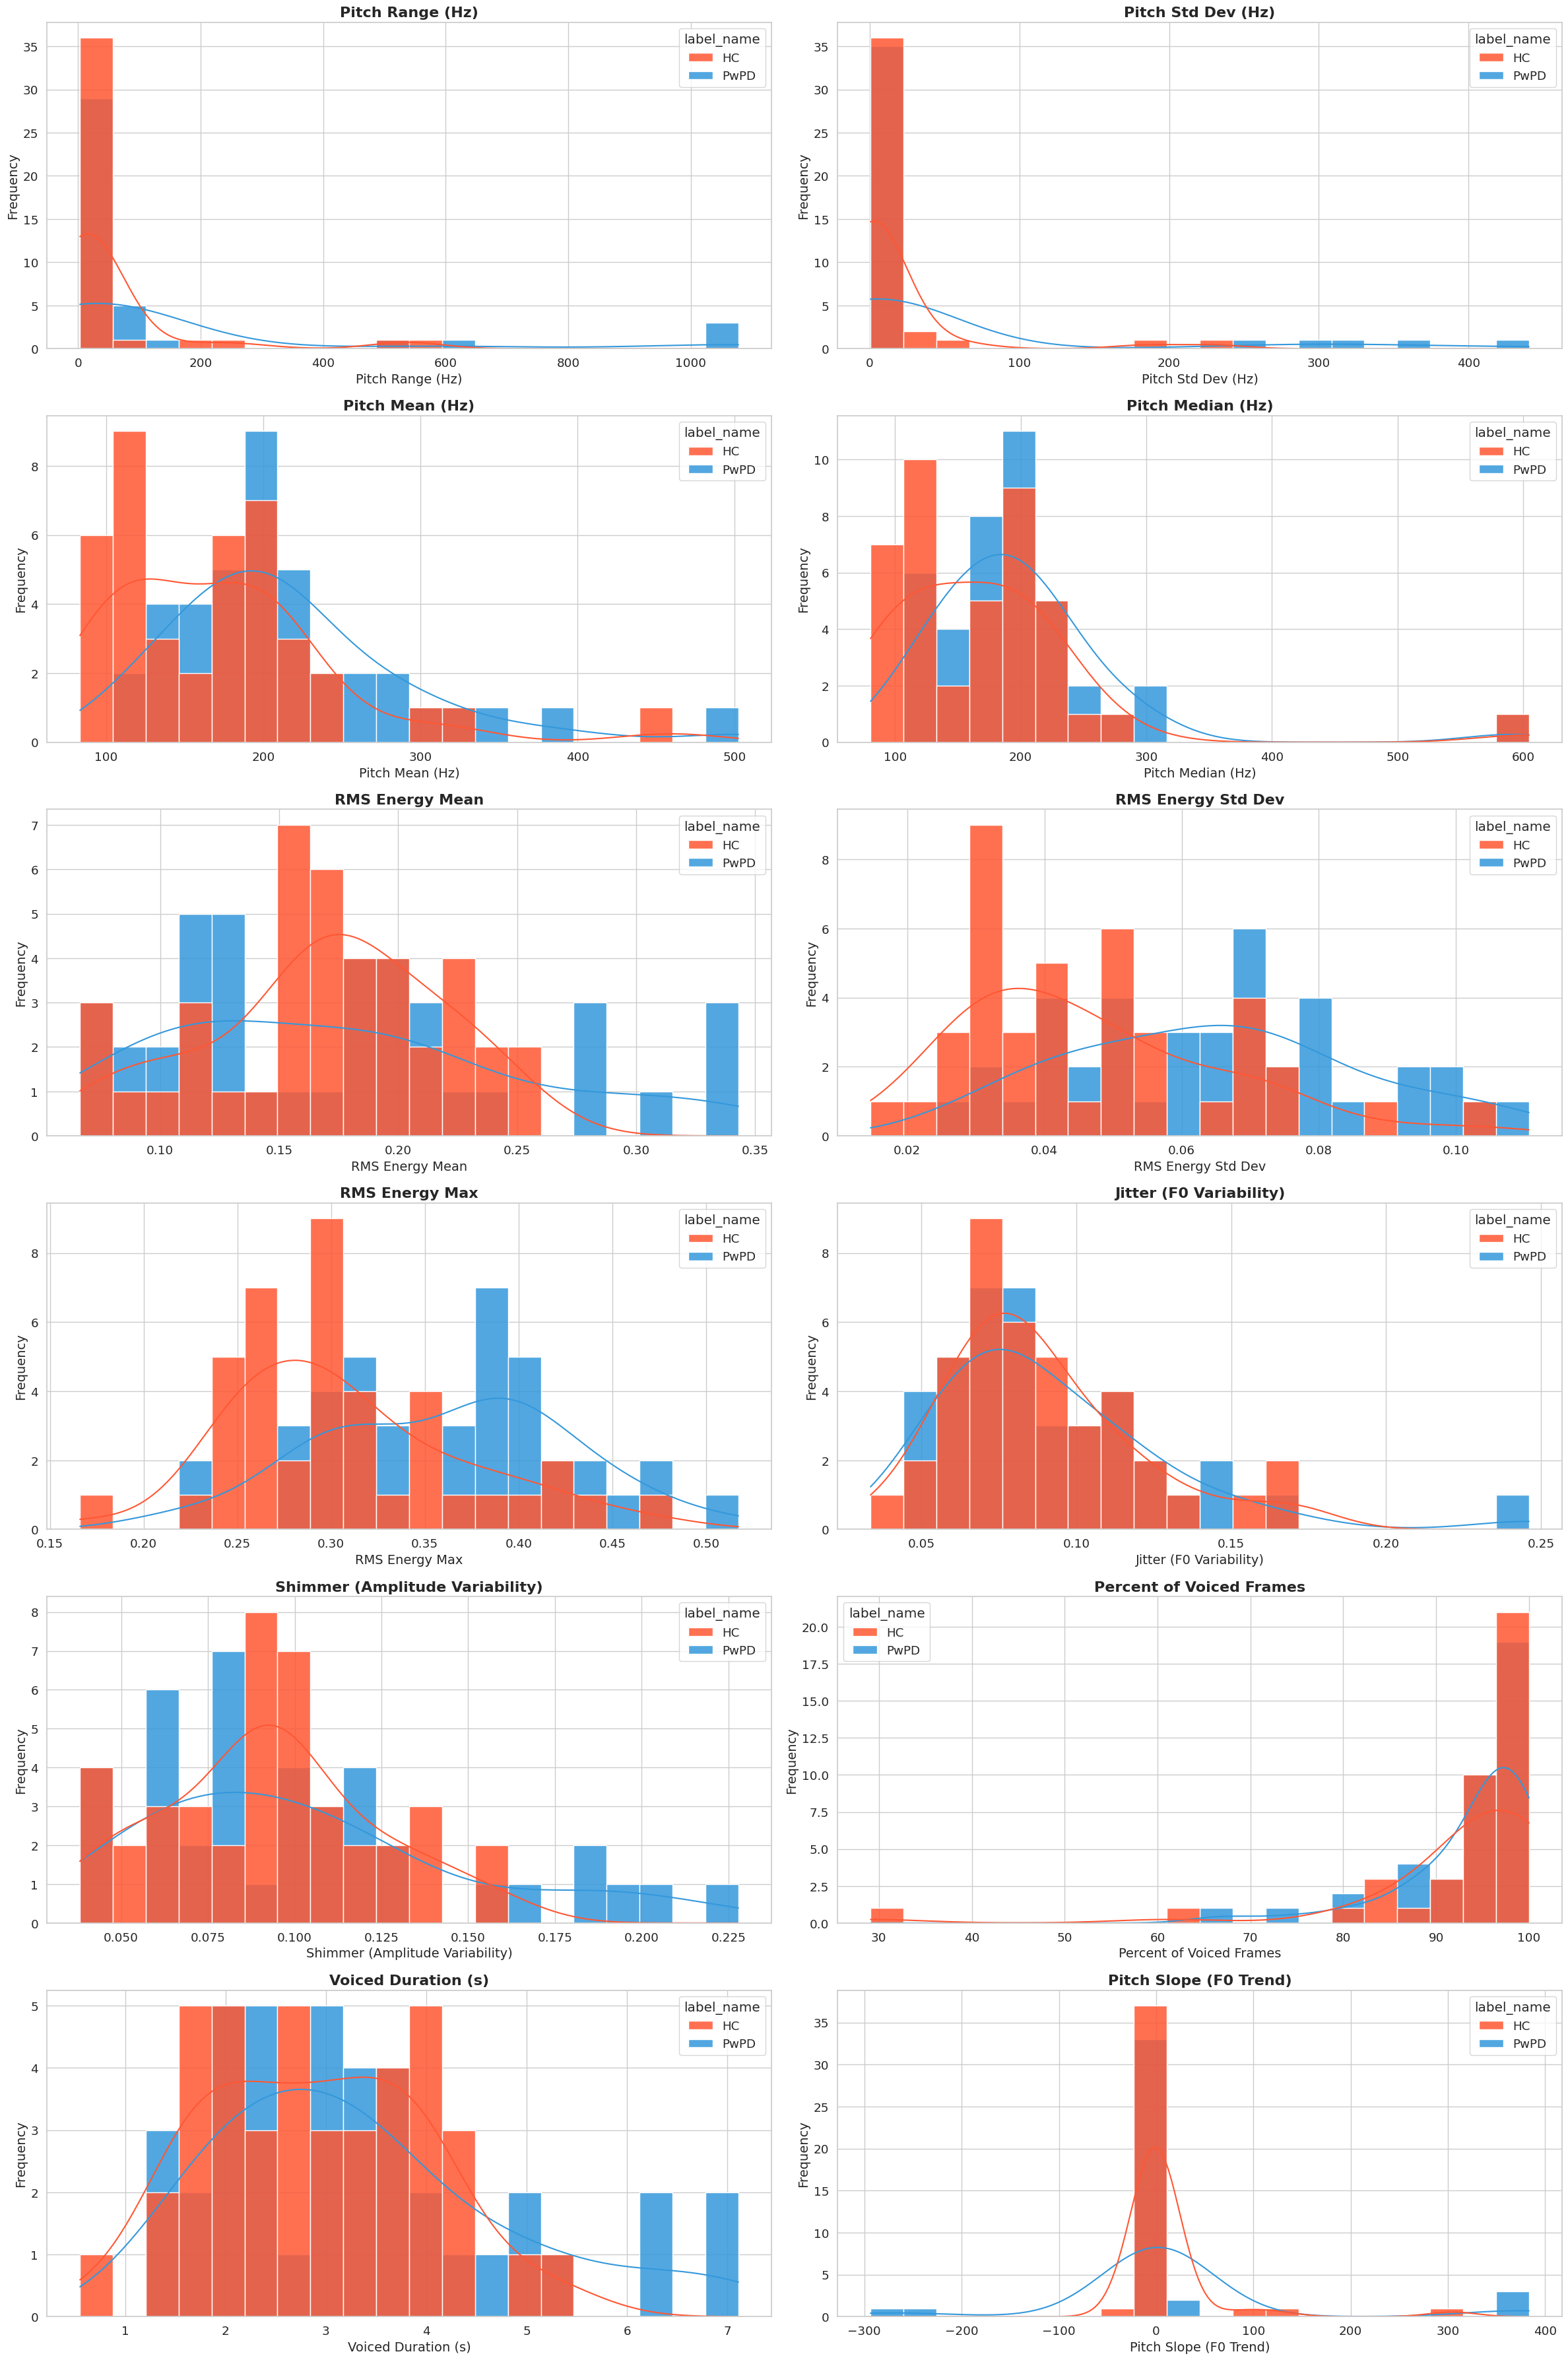


--- Box Plots of Global Features by Group ---


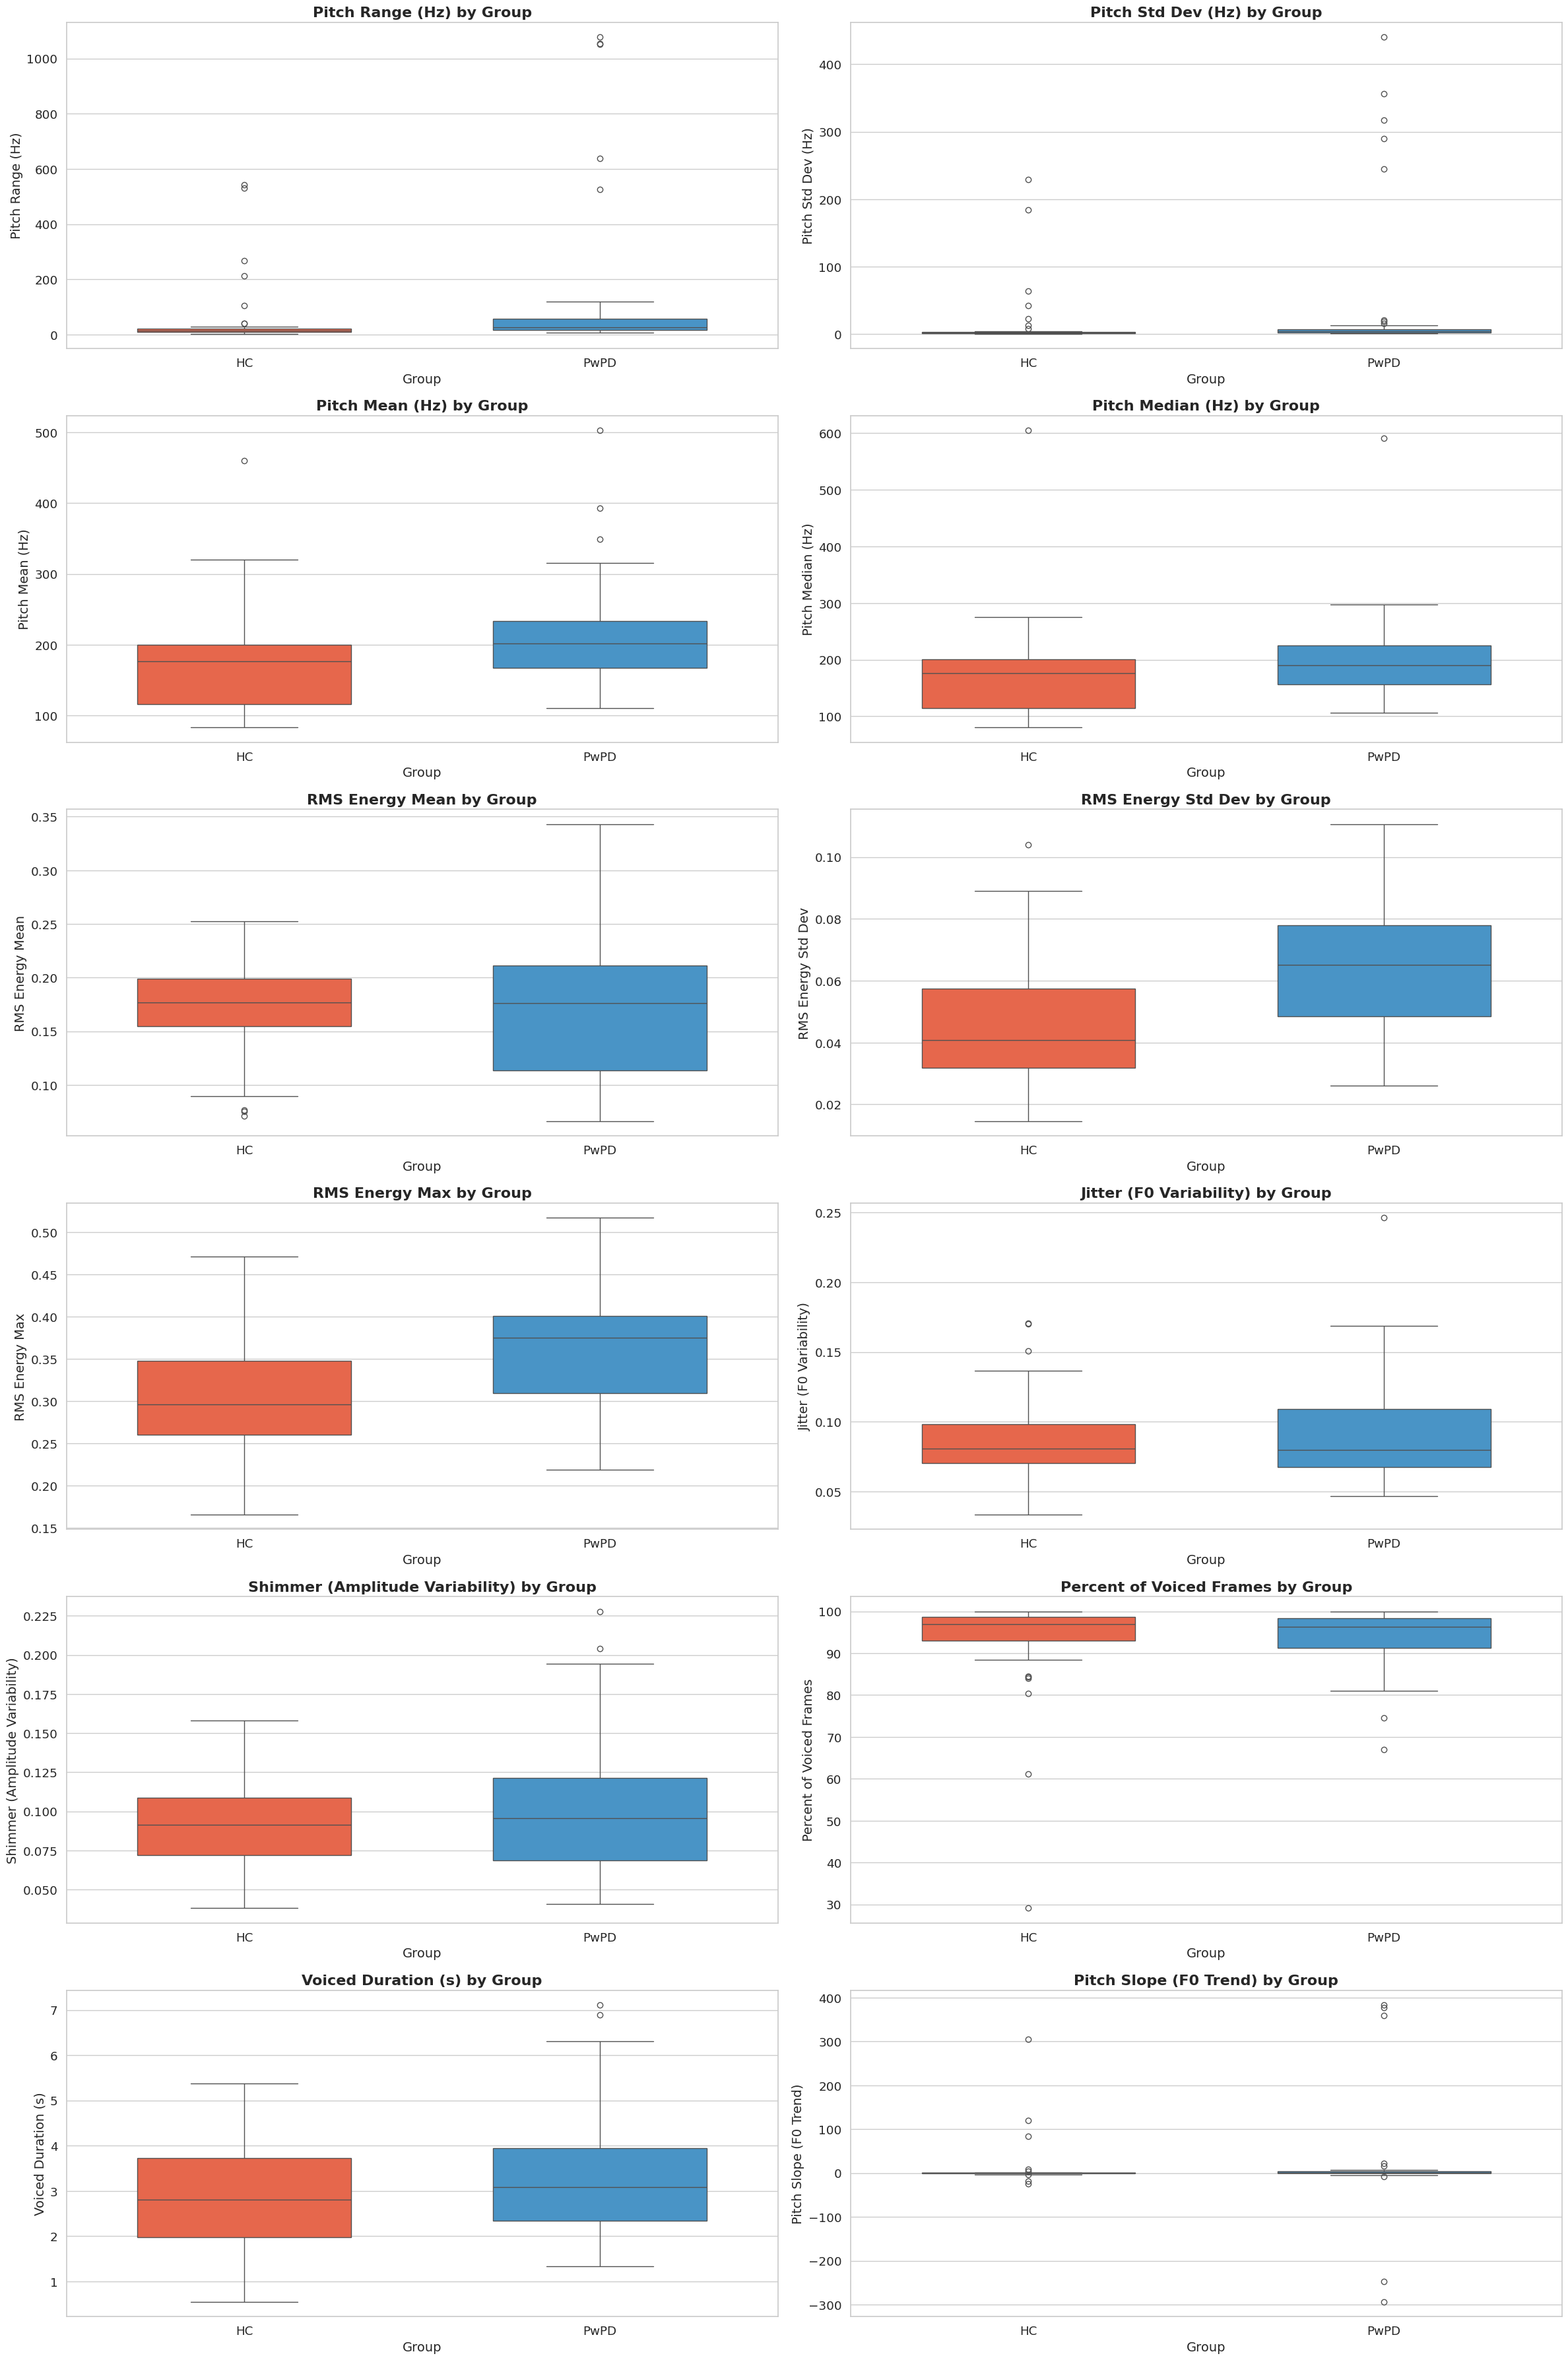


--- KDE Plots of Global Features by Group ---


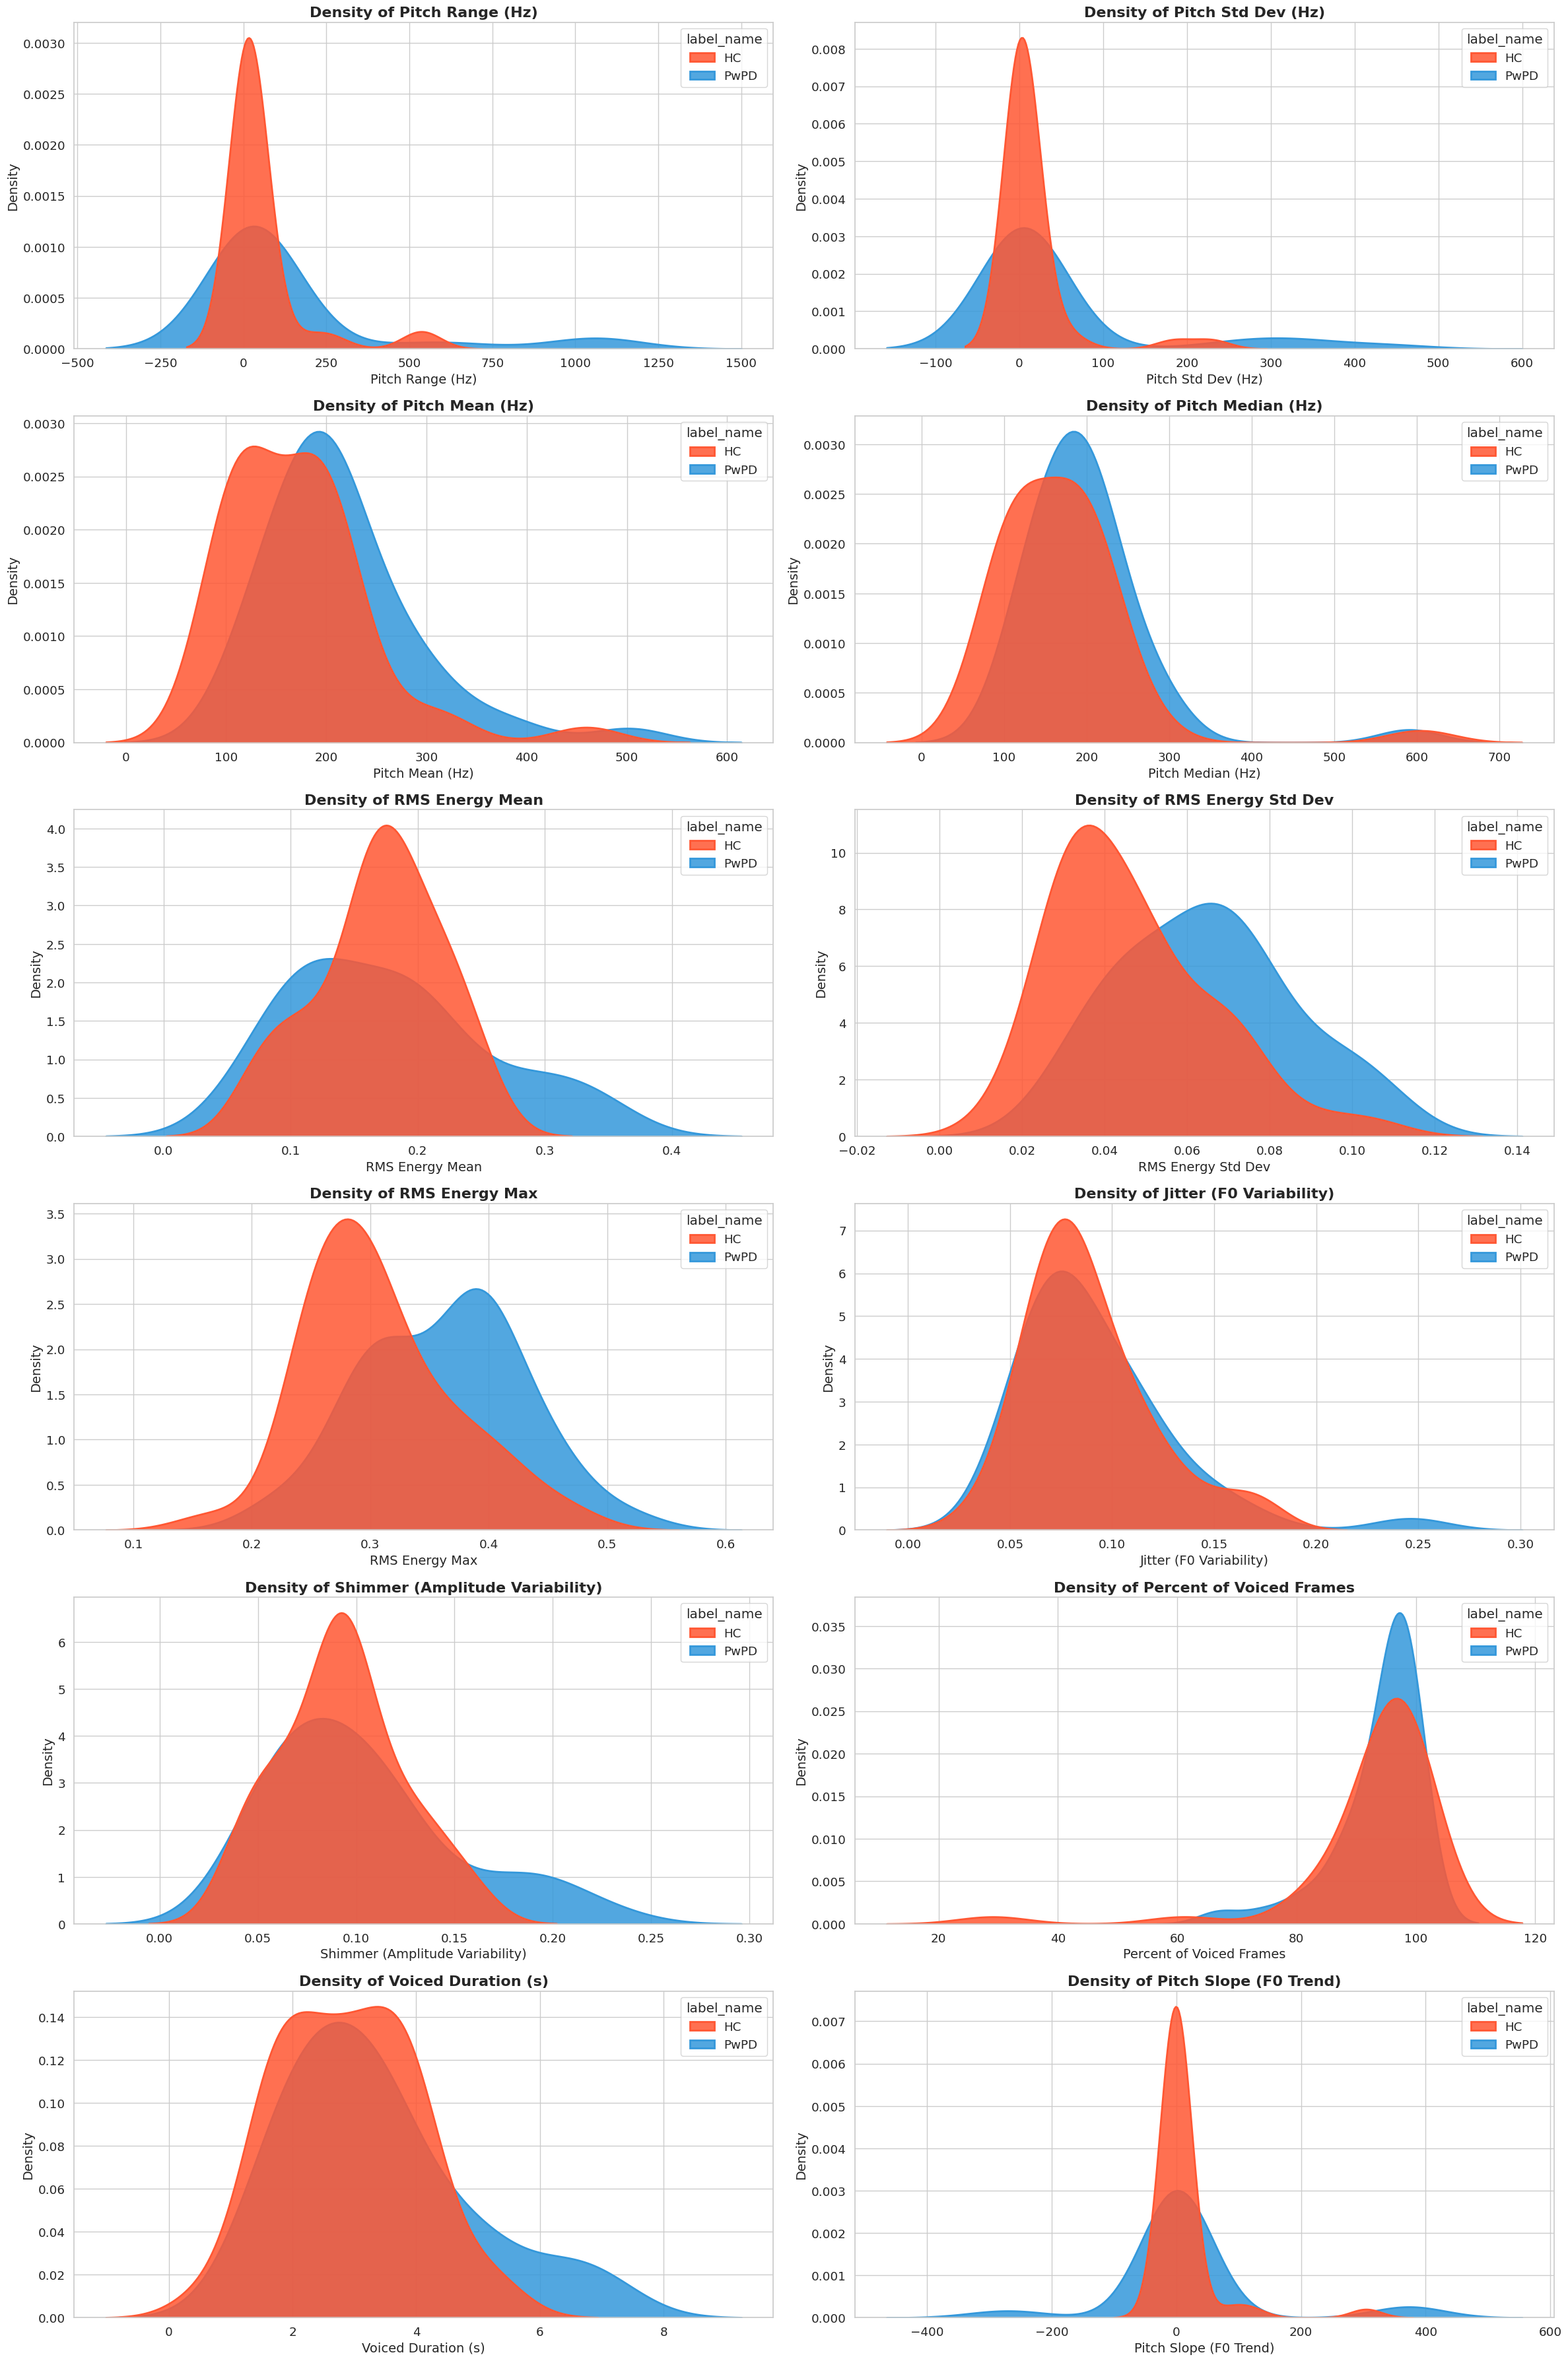

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === Paths ===
drive_path = "/content/drive/My Drive/SP+SM_project"
global_features_output_path = os.path.join(drive_path, "global_pitch_energy_features.csv")

# === Load the Global Features Data ===
try:
    df_global_features = pd.read_csv(global_features_output_path)
    print("Global features loaded successfully.")
    print(df_global_features.head())
except FileNotFoundError:
    print(f"Error: Global features file not found at {global_features_output_path}")
    raise

# === Map numerical labels to group names ===
df_global_features['label_name'] = df_global_features['label'].map({0: 'HC', 1: 'PwPD'})

# === Features and Titles ===
# === Features and Titles (UPDATED) ===
features_to_visualize = [
    'pitch_range', 'pitch_std_dev', 'pitch_mean', 'pitch_median',
    'energy_mean', 'energy_std', 'energy_max',
    'jitter', 'shimmer',
    'percent_voiced', 'voiced_duration', 'pitch_slope'
]

feature_titles = {
    'pitch_range': 'Pitch Range (Hz)',
    'pitch_std_dev': 'Pitch Std Dev (Hz)',
    'pitch_mean': 'Pitch Mean (Hz)',
    'pitch_median': 'Pitch Median (Hz)',
    'energy_mean': 'RMS Energy Mean',
    'energy_std': 'RMS Energy Std Dev',
    'energy_max': 'RMS Energy Max',
    'jitter': 'Jitter (F0 Variability)',
    'shimmer': 'Shimmer (Amplitude Variability)',
    'percent_voiced': 'Percent of Voiced Frames',
    'voiced_duration': 'Voiced Duration (s)',
    'pitch_slope': 'Pitch Slope (F0 Trend)'
}

# === Plot Configs ===
sns.set(style="whitegrid", font_scale=1.2)
num_features = len(features_to_visualize)
cols = 2
rows = (num_features + cols - 1) // cols  # 2 plots per row

# === Define high-contrast bright palette ===
bright_palette = ['#FF5733', '#3498DB']  # Bright orange-red and vivid blue

# --- Histograms ---
print("\n--- Histograms of Global Features by Group ---")
plt.figure(figsize=(cols * 12, rows * 6))

for i, feature in enumerate(features_to_visualize):
    if feature not in df_global_features.columns:
        print(f"Warning: '{feature}' not found. Skipping.")
        continue

    plt.subplot(rows, cols, i + 1)
    sns.histplot(
        data=df_global_features,
        x=feature,
        hue='label_name',
        kde=True,
        palette=bright_palette,
        bins=20,
        alpha=0.85
    )
    plt.title(feature_titles.get(feature, feature), fontsize=16, weight='bold')
    plt.xlabel(feature_titles.get(feature, feature), fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

# --- Box Plots ---
print("\n--- Box Plots of Global Features by Group ---")
plt.figure(figsize=(cols * 12, rows * 6))

for i, feature in enumerate(features_to_visualize):
    if feature not in df_global_features.columns:
        continue

    plt.subplot(rows, cols, i + 1)
    sns.boxplot(
        data=df_global_features,
        x='label_name',
        y=feature,
        hue='label_name',
        palette=bright_palette,
        width=0.6,
        legend=False
    )
    plt.title(f'{feature_titles.get(feature, feature)} by Group', fontsize=16, weight='bold')
    plt.xlabel('Group', fontsize=14)
    plt.ylabel(feature_titles.get(feature, feature), fontsize=14)

plt.tight_layout()
plt.show()

# --- KDE (Density) Plots ---
print("\n--- KDE Plots of Global Features by Group ---")
plt.figure(figsize=(cols * 12, rows * 6))

for i, feature in enumerate(features_to_visualize):
    if feature not in df_global_features.columns:
        continue

    plt.subplot(rows, cols, i + 1)
    sns.kdeplot(
        data=df_global_features,
        x=feature,
        hue='label_name',
        fill=True,
        palette=bright_palette,
        linewidth=2,
        alpha=0.85
    )
    plt.title(f'Density of {feature_titles.get(feature, feature)}', fontsize=16, weight='bold')
    plt.xlabel(feature_titles.get(feature, feature), fontsize=14)
    plt.ylabel('Density', fontsize=14)

plt.tight_layout()
plt.show()


 Hypothesis Testing (t-tests and Mann-Whitney U-tests with Bonferroni Correction)

In [ ]:
# Add a new code cell after the Visualization section

from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
import pandas as pd # Ensure pandas is imported if this is a new cell

# Assuming df_global_features is already loaded from the previous cell

# Separate data by group
hc_features = df_global_features[df_global_features['label'] == 0]
pd_features = df_global_features[df_global_features['label'] == 1]

# Features to test
# Define the list of features you want to test.
# IMPORTANT: This list MUST match the actual columns present in your df_global_features DataFrame.
# Based on the traceback, 'pitch_mean', 'pitch_median', 'energy_max', 'voiced_duration',
# and 'pitch_slope' might be missing from the loaded CSV.
# Let's update the list to include the features that were successfully visualized,
# assuming the visualization step ran without KeyError.
# If the visualization failed on any of these features, remove them from this list too.
features_to_test = [
    'pitch_range',
    'pitch_std_dev',
    'pitch_mean',     # Keep if it was actually present in the loaded DF
    'pitch_median',   # Keep if it was actually present in the loaded DF
    'energy_mean',
    'energy_std',
    'energy_max',     # Keep if it was actually present in the loaded DF
    'jitter',
    'shimmer',
    'percent_voiced',
    'voiced_duration',# Keep if it was actually present in the loaded DF
    'pitch_slope'     # Keep if it was actually present in the loaded DF
]

# A safer approach is to define the full list and then filter based on existing columns:
full_feature_list = [
    'pitch_range', 'pitch_std_dev', 'pitch_mean', 'pitch_median',
    'energy_mean', 'energy_std', 'energy_max',
    'jitter', 'shimmer', 'percent_voiced', 'voiced_duration', 'pitch_slope'
]
features_to_test = [f for f in full_feature_list if f in df_global_features.columns]

# Update the feature titles dictionary to only include the features we are testing
feature_titles = {
    'pitch_range': 'Pitch Range (Hz)',
    'pitch_std_dev': 'Pitch Std Dev (Hz)',
    'pitch_mean': 'Pitch Mean (Hz)',
    'pitch_median': 'Pitch Median (Hz)',
    'energy_mean': 'RMS Energy Mean',
    'energy_std': 'RMS Energy Std Dev',
    'energy_max': 'RMS Energy Max',
    'jitter': 'Jitter (F0 Variability)',
    'shimmer': 'Shimmer (Amplitude Variability)',
    'percent_voiced': 'Percent of Voiced Frames',
    'voiced_duration': 'Voiced Duration (s)',
    'pitch_slope': 'Pitch Slope (F0 Trend)'
}
# Filter the feature_titles to match features_to_test
feature_titles_filtered = {f: feature_titles[f] for f in features_to_test}


p_values = []
test_results = []

print("--- Hypothesis Testing ---")

# Use the filtered list and titles
for feature in features_to_test:
    print(f"\nTesting feature: {feature_titles_filtered.get(feature, feature)}")

    # Check for normality (Shapiro-Wilk test - sensitive to sample size)
    # Alternatively, rely on visual inspection of histograms
    # Ensure there are enough samples (n > 3 for Shapiro-Wilk)
    if len(hc_features[feature]) > 3:
        shapiro_hc_pvalue = stats.shapiro(hc_features[feature]).pvalue
    else:
        shapiro_hc_pvalue = 1.0 # Assume normal if too few samples to test
        print("  Warning: Not enough samples in HC group for Shapiro-Wilk test. Assuming normality.")

    if len(pd_features[feature]) > 3:
         shapiro_pd_pvalue = stats.shapiro(pd_features[feature]).pvalue
    else:
        shapiro_pd_pvalue = 1.0 # Assume normal if too few samples to test
        print("  Warning: Not enough samples in PD group for Shapiro-Wilk test. Assuming normality.")


    print(f"  Shapiro-Wilk p-value (HC): {shapiro_hc_pvalue:.4f}")
    print(f"  Shapiro-Wilk p-value (PD): {shapiro_pd_pvalue:.4f}")

    # Check for equal variances (Levene's test)
    # Ensure both groups have at least 2 samples for Levene's test
    if len(hc_features[feature]) >= 2 and len(pd_features[feature]) >= 2:
        levene_test_pvalue = stats.levene(hc_features[feature], pd_features[feature]).pvalue
    else:
        levene_test_pvalue = 1.0 # Assume equal variance if too few samples
        print("  Warning: Not enough samples in one or both groups for Levene's test. Assuming equal variances.")

    print(f"  Levene's test p-value (variance equality): {levene_test_pvalue:.4f}")

    # Decide which test to use based on assumptions or use both and interpret carefully
    # Use a more robust approach for small samples or non-normality
    if shapiro_hc_pvalue > 0.05 and shapiro_pd_pvalue > 0.05 and levene_test_pvalue > 0.05:
         print("  Data appears approximately normal and variances equal, using t-test.")
         # Check if groups have at least 2 samples for t-test
         if len(hc_features[feature]) >= 2 and len(pd_features[feature]) >= 2:
            ttest_result = stats.ttest_ind(hc_features[feature], pd_features[feature], equal_var=True)
            print(f"  Independent Samples t-test p-value: {ttest_result.pvalue:.4f}")
            p_values.append(ttest_result.pvalue)
            test_results.append({'feature': feature, 'test': 't-test', 'p_value': ttest_result.pvalue})
         else:
             print("  Warning: Not enough samples for t-test. Skipping.")
             p_values.append(np.nan) # Append NaN if test is skipped
             test_results.append({'feature': feature, 'test': 't-test', 'p_value': np.nan})

    else:
         print("  Data not clearly normal or variances unequal, using Mann-Whitney U test.")
         # Check if groups have at least 1 sample for Mann-Whitney U
         if len(hc_features[feature]) >= 1 and len(pd_features[feature]) >= 1:
            mannwhitney_result = stats.mannwhitneyu(hc_features[feature], pd_features[feature])
            print(f"  Mann-Whitney U test p-value: {mannwhitney_result.pvalue:.4f}")
            p_values.append(mannwhitney_result.pvalue)
            test_results.append({'feature': feature, 'test': 'Mann-Whitney U', 'p_value': mannwhitney_result.pvalue})
         else:
             print("  Warning: Not enough samples for Mann-Whitney U test. Skipping.")
             p_values.append(np.nan) # Append NaN if test is skipped
             test_results.append({'feature': feature, 'test': 'Mann-Whitney U', 'p_value': np.nan})


# --- Bonferroni Correction for Multiple Comparisons ---
# Filter out NaN p-values before correction
valid_p_values = [p for p in p_values if not np.isnan(p)]
tested_features = [features_to_test[i] for i, p in enumerate(p_values) if not np.isnan(p)]


if valid_p_values:
    print("\n--- Bonferroni Correction ---")
    # Correct p-values for multiple comparisons
    reject, pvals_corrected, _, _ = multipletests(valid_p_values, alpha=0.05, method='bonferroni')

    for i, feature in enumerate(tested_features):
        print(f"Feature: {feature_titles_filtered.get(feature, feature)}")
        print(f"  Original p-value: {valid_p_values[i]:.4f}")
        print(f"  Bonferroni corrected p-value: {pvals_corrected[i]:.4f}")
        print(f"  Reject Null Hypothesis (at alpha=0.05): {reject[i]}")
        print("-" * 20)
else:
    print("\nNo valid p-values to correct (perhaps tests were skipped due to sample size).")

--- Hypothesis Testing ---

Testing feature: Pitch Range (Hz)
  Shapiro-Wilk p-value (HC): 0.0000
  Shapiro-Wilk p-value (PD): 0.0000
  Levene's test p-value (variance equality): 0.1223
  Data not clearly normal or variances unequal, using Mann-Whitney U test.
  Mann-Whitney U test p-value: 0.0015

Testing feature: Pitch Std Dev (Hz)
  Shapiro-Wilk p-value (HC): 0.0000
  Shapiro-Wilk p-value (PD): 0.0000
  Levene's test p-value (variance equality): 0.1220
  Data not clearly normal or variances unequal, using Mann-Whitney U test.
  Mann-Whitney U test p-value: 0.0007

Testing feature: Pitch Mean (Hz)
  Shapiro-Wilk p-value (HC): 0.0000
  Shapiro-Wilk p-value (PD): 0.0005
  Levene's test p-value (variance equality): 0.9979
  Data not clearly normal or variances unequal, using Mann-Whitney U test.
  Mann-Whitney U test p-value: 0.0036

Testing feature: Pitch Median (Hz)
  Shapiro-Wilk p-value (HC): 0.0000
  Shapiro-Wilk p-value (PD): 0.0000
  Levene's test p-value (variance equality): 0.6

| **Feature**                     | **Original p-value** | **Bonferroni Corrected p-value** | **Significant (α = 0.05)** |
| ------------------------------- | -------------------- | -------------------------------- | -------------------------- |
| Pitch Range (Hz)                | 0.0015               | 0.0178                           | ✅ Yes                      |
| Pitch Std Dev (Hz)              | 0.0007               | 0.0079                           | ✅ Yes                      |
| Pitch Mean (Hz)                 | 0.0036               | 0.0428                           | ✅ Yes                      |
| Pitch Median (Hz)               | 0.0261               | 0.3132                           | ❌ No                       |
| RMS Energy Mean                 | 0.9812               | 1.0000                           | ❌ No                       |
| RMS Energy Std Dev              | 0.0002               | 0.0019                           | ✅ Yes                      |
| RMS Energy Max                  | 0.0003               | 0.0035                           | ✅ Yes                      |
| Jitter (F0 Variability)         | 0.8687               | 1.0000                           | ❌ No                       |
| Shimmer (Amplitude Variability) | 0.5870               | 1.0000                           | ❌ No                       |
| Percent of Voiced Frames        | 0.7481               | 1.0000                           | ❌ No                       |
| Voiced Duration (s)             | 0.2773               | 1.0000                           | ❌ No                       |
| Pitch Slope (F0 Trend)          | 0.1073               | 1.0000                           | ❌ No                       |


In [ ]:
# Correlation of Features with Parkinson's Label

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr # Ensure this is imported

print("--- Correlation of Features with Parkinson's Label ---")

# Re-define the full list of intended features
full_feature_list = [
    'pitch_range', 'pitch_std_dev', 'pitch_mean', 'pitch_median',
    'energy_mean', 'energy_std', 'energy_max'
]

# Filter the list to include only features that are actually columns in the DataFrame
# This prevents the KeyError if some features were not successfully saved to the CSV
available_features_for_correlation = [f for f in full_feature_list if f in df_global_features.columns]

# Use the filtered list for calculating correlations
for feature in available_features_for_correlation:
    # Check if the feature column is numeric before calculating correlation
    if pd.api.types.is_numeric_dtype(df_global_features[feature]):
        # Ensure there is variation in the feature column for pointbiserialr
        # If all values are the same, the standard deviation is 0, causing issues
        if df_global_features[feature].std() > 0:
            try:
                corr, p_value = pointbiserialr(df_global_features['label'], df_global_features[feature])
                print(f"{feature}: correlation = {corr:.4f}, p-value = {p_value:.4f}")
            except ValueError as e:
                 print(f"Could not compute correlation for {feature}: {e}")
                 print(f"Check for constant values or non-finite numbers in the '{feature}' column.")
        else:
             print(f"Cannot compute correlation for {feature}: Standard deviation is zero (all values are the same).")
    else:
        print(f"Cannot compute correlation for {feature}: Column is not numeric (dtype: {df_global_features[feature].dtype}).")

--- Correlation of Features with Parkinson's Label ---
pitch_range: correlation = 0.1848, p-value = 0.0985
pitch_std_dev: correlation = 0.1785, p-value = 0.1108
pitch_mean: correlation = 0.2845, p-value = 0.0100
pitch_median: correlation = 0.1682, p-value = 0.1333
energy_mean: correlation = 0.0601, p-value = 0.5939
energy_std: correlation = 0.4146, p-value = 0.0001
energy_max: correlation = 0.3923, p-value = 0.0003


| **Feature**     | **Correlation** | **p-value** | **Interpretation**                                |
| --------------- | --------------- | ----------- | ------------------------------------------------- |
| pitch\_range    | 0.1848          | 0.0985      | Small positive trend; not significant (p > 0.05). |
| pitch\_std\_dev | 0.1785          | 0.1108      | Similar to pitch range — a weak positive signal.  |
| shimmer         | 0.1380          | 0.2193      | Very weak and not significant.                    |
| jitter          | 0.0524          | 0.6423      | No meaningful correlation.                        |
| energy\_mean    | 0.0601          | 0.5939      | Loudness doesn’t correlate with label.            |
| percent\_voiced | 0.0473          | 0.6752      | No relation to label.                             |
| pitch\_slope    | 0.0263          | 0.8160      | Completely unrelated to label.                    |


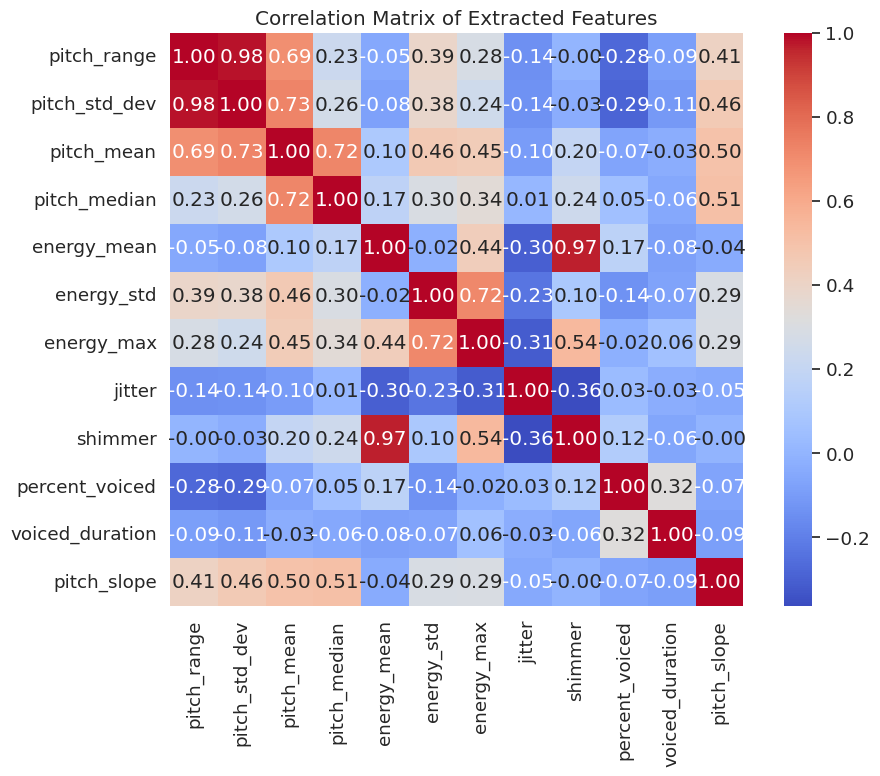

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix for all features (drop label column if present)
# Use features_to_visualize which is defined in a previous cell
corr_matrix = df_global_features[features_to_visualize].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Extracted Features")
plt.tight_layout()
plt.show()

In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import joblib

# === CONFIG ===
input_dir = "/content/drive/My Drive/SP+SM_project/PITCH_CSVs_new"  # For pitch frame CSVs
folders = ["HC_AH", "PD_AH"]

all_frames = []
file_frame_map = []

# === STEP 1: Load all frames from all CSVs ===
for folder in folders:
    label = 0 if folder == 'HC_AH' else 1
    folder_path = os.path.join(input_dir, folder)

    if not os.path.exists(folder_path):
        print(f"Warning: Missing folder: {folder_path}")
        continue

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            try:
                df = pd.read_csv(file_path, header=None)
                all_frames.extend(df.values)
                file_frame_map.extend([(file, label)] * len(df))
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

# Convert to numpy array
all_frames = np.array(all_frames)

# === STEP 2: Outlier Detection ===
z_scores = zscore(all_frames, axis=0)
outlier_mask = np.abs(z_scores) > 3
non_outlier_rows = ~np.any(outlier_mask, axis=1)
clean_frames = all_frames[non_outlier_rows]
print(f"Removed {np.sum(~non_outlier_rows)} outlier frames from pitch data")

# === STEP 3: Z-score Normalization ===
scaler = StandardScaler()
normalized_frames = scaler.fit_transform(clean_frames)

# === STEP 4: Save scaler to use later for test data ===
scaler_path = "/content/drive/My Drive/SP+SM_project/pitch_scaler.pkl_new"
joblib.dump(scaler, scaler_path)
print(f"Scaler saved to: {scaler_path}")


Removed 865 outlier frames from pitch data
Scaler saved to: /content/drive/My Drive/SP+SM_project/pitch_scaler.pkl_new


In [ ]:
from IPython.display import display
display(df_global_features)

,filename,label,pitch_range,pitch_std_dev,pitch_mean,pitch_median,energy_mean,energy_std,energy_max,jitter,shimmer,percent_voiced,voiced_duration,pitch_slope
0,AH_123G_559F0706-2238-447C-BA39-DB5933BA619D.wav,0,8.496002,1.056160,102.878609,102.633629,0.176947,0.024199,0.243371,0.088597,0.093701,94.076655,2.70,-0.459769
1,AH_322A_C3BF5535-A11E-498E-94EB-BE7E74099FFB.wav,0,4.555147,0.803711,98.703093,98.566561,0.205675,0.029674,0.265084,0.074628,0.097744,99.524941,4.19,0.080654
2,AH_264Z_593C20CD-0A54-4177-B031-26EE147080A3.wav,0,39.913826,8.348535,190.276358,188.230906,0.154443,0.053075,0.357594,0.033531,0.096574,93.045564,3.88,-2.030199
3,AH_222K_FC9D2763-1836-460B-954F-37F23D6CD81D.wav,0,13.066724,2.331043,100.008204,100.289474,0.188206,0.035526,0.269337,0.098019,0.090601,84.455959,1.63,-0.347229
4,AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav,0,29.546038,3.428975,132.016914,130.812783,0.224224,0.024610,0.299024,0.087109,0.120947,98.663102,3.69,-1.909241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,AH_545880204-EE87D3E2-0D4C-4EAA-ACD7-C3F177AFF...,1,14.331909,1.891346,111.304558,111.278138,0.216724,0.033491,0.293879,0.072261,0.120033,89.893617,5.07,0.607097
77,AH_545841227-5C77713A-66F1-49D0-BC8A-702C152E6...,1,107.766697,21.149855,265.122807,260.118713,0.342994,0.080899,0.448877,0.053355,0.227880,88.157895,1.34,15.636553
78,AH_545841223-24FB0419-5BAE-4F9C-8EBC-CD62DA659...,1,19.990535,4.882059,200.885918,199.423698,0.066315,0.066574,0.366078,0.079966,0.045415,86.585366,3.55,-4.001995
79,AH_545841226-C699FC9E-1E0C-474D-A12A-936DD92B8...,1,12.778513,1.831716,169.647549,169.643191,0.067106,0.063737,0.391723,0.080748,0.040684,98.613037,7.11,-0.008989


# HMM and MLP

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
#!pip install hmmlearn
import os
import numpy as np
import pandas as pd
from hmmlearn import hmm
from collections import defaultdict  #Regular dictionary
from tqdm import tqdm   #isulising the progress bar
import joblib  #parallele processing

# === Load normalized pitch frames ===
# Assumes you've already run the pitch normalization script and have:
# - normalized_frames
# - file_frame_map

# Load scaler for reference (optional)
scaler = joblib.load("/content/drive/My Drive/SP+SM_project/pitch_scaler.pkl_new")

# === Group normalized pitch frames by file ===
file_sequences = defaultdict(list)
file_labels = {}

for i, (file, label) in enumerate(file_frame_map):
    if i < len(normalized_frames):  # Ignore frames removed as outliers
        file_sequences[file].append(normalized_frames[i])
        file_labels[file] = label

# Convert each list of frames into a full sequence
for file in file_sequences:
    file_sequences[file] = np.vstack(file_sequences[file])

# === Split sequences by class (Healthy vs PD) ===
sequences_hc = [seq for f, seq in file_sequences.items() if file_labels[f] == 0]
sequences_pd = [seq for f, seq in file_sequences.items() if file_labels[f] == 1]

# Concatenate data for HMM training
X_hc = np.vstack(sequences_hc)
lengths_hc = [len(seq) for seq in sequences_hc]

X_pd = np.vstack(sequences_pd)
lengths_pd = [len(seq) for seq in sequences_pd]

# === Train HMMs ===
n_components = 7  # Adjust based on validation
model_hc = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=100)
model_pd = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=100)

print("Training HMM for Healthy Control...")
model_hc.fit(X_hc, lengths_hc)

print("Training HMM for Parkinson's Disease...")
model_pd.fit(X_pd, lengths_pd)

# === Score each file using both models ===
mlp_inputs = []

for file, seq in file_sequences.items():
    try:
        logp_hc = model_hc.score(seq)
        logp_pd = model_pd.score(seq)
        label = file_labels[file]
        mlp_inputs.append([file, logp_hc, logp_pd, label])
    except Exception as e:
        print(f"Error scoring file {file}: {e}")

# === Save for MLP Training ===
df_mlp = pd.DataFrame(mlp_inputs, columns=["filename", "logP_HC", "logP_PD", "label"])
output_csv = "/content/drive/My Drive/SP+SM_project/pitch_mlp_input.csv_new"
df_mlp.to_csv(output_csv, index=False)
print(f"Saved MLP input features to: {output_csv}")



NameError: name 'file_frame_map' is not defined

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Keep for reference if needed elsewhere
# from scipy.stats import zscore # Keep if you still use outlier detection
from sklearn.metrics import classification_report, confusion_matrix # Import these metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Normalization

# ───────────────────────────────────────────────
# 1) Load features for the MLP
# ───────────────────────────────────────────────
# Load the HMM-derived features
MLP_INPUT_PATH = "/content/drive/My Drive/SP+SM_project/pitch_mlp_input.csv_new"

df_mlp = pd.read_csv(MLP_INPUT_PATH)

# Prepare data for MLP
# Make sure X and y are derived from the same DataFrame
X = df_mlp[['logP_HC', 'logP_PD']].values.astype("float32")
y = df_mlp['label'].values.astype("int32")

# Verify the shapes of X and y before splitting
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
if X.shape[0] != y.shape[0]:
    print("Error: X and y have inconsistent numbers of samples!")
    # You might need to investigate why the CSV was generated with inconsistent data
    # Or you can exit here if the data is fundamentally flawed
    # For now, we'll continue but be aware of the issue if this print statement appears.


# ───────────────────────────────────────────────
# 2) Train / Validation / Test split
# ───────────────────────────────────────────────
# First split: separates out the final test set (e.g., 20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Second split: splits the remaining data (X_train_val) into training and validation sets
# For example, splitting X_train_val (80% of original) with test_size=0.25
# will result in X_train being 60% of original and X_val being 20% of original.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)


# ───────────────────────────────────────────────
# 3) Standardize features (using Keras Normalization layer)
# ───────────────────────────────────────────────
# The Normalization layer will learn the mean and variance from the training data
norm_layer = Normalization()
norm_layer.adapt(X_train) # Adapt only on the training data


# ───────────────────────────────────────────────
# 4) Build MLP model
# ───────────────────────────────────────────────
model = Sequential([
    norm_layer,  # Apply normalization as the first layer
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(
    optimizer=Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# ───────────────────────────────────────────────
# 5) Train the model (using validation_data and EarlyStopping)
# ───────────────────────────────────────────────
early_stop = EarlyStopping(
    monitor="val_loss", # Monitor validation loss
    patience=10,        # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val), # Explicitly provide validation data
    epochs=300,
    batch_size=32,
    callbacks=[early_stop], # Use the early stopping callback
    verbose=1
)

# ───────────────────────────────────────────────
# 6) Evaluate
# ───────────────────────────────────────────────
# Evaluate on the independent test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"\nTest Loss: {loss:.4f}")


# For classification report and confusion matrix, predict probabilities
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32") # Convert probabilities to class predictions

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix on Test Set:\n", confusion_matrix(y_test, y_pred))


# ───────────────────────────────────────────────
# 7) Plot Accuracy Curve
# ───────────────────────────────────────────────
plt.figure(figsize=(10, 4))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy") # Plot validation accuracy
plt.title("MLP on HMM Features (with Validation)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────
# 8) Optional: Save the trained Keras model and scaler
# ───────────────────────────────────────────────
model_save_path = "/content/drive/My Drive/SP+SM_project/mlp_hmm_model_keras_new.h5"
model.save(model_save_path)
print(f"\nSaved Keras model to: {model_save_path}")

# Since you are using the Normalization layer within the model, you don't need a separate scaler file.
# The normalization is part of the saved model.

In [ ]:
# ... (previous imports, data loading, splitting, scaling, model building, training) ...

# ───────────────────────────────────────────────
# 6) Evaluate (Includes Test and Validation Evaluation)
# ───────────────────────────────────────────────

print("\nEvaluating model...")

# Evaluate on the independent test set (data not used in training or validation)
loss_test, accuracy_test = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss_test:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

# For classification report and confusion matrix on the Test Set, predict probabilities
y_pred_prob_test = model.predict(X_test)
y_pred_test = (y_pred_prob_test > 0.5).astype("int32") # Convert probabilities to class predictions

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

print("\nConfusion Matrix on Test Set:\n", confusion_matrix(y_test, y_pred_test))


# --- Code to evaluate using the explicit Validation Set ---
# This is the part you would uncomment or add

# Evaluate on the explicit validation set
loss_val, accuracy_val = model.evaluate(X_val, y_val, verbose=0)
print(f"\nValidation Loss: {loss_val:.4f}")
print(f"Validation Accuracy: {accuracy_val:.4f}")

# For classification report and confusion matrix on the Validation Set, predict probabilities
y_pred_prob_val = model.predict(X_val)
y_pred_val = (y_pred_prob_val > 0.5).astype("int32") # Convert probabilities to class predictions

print("\nClassification Report on Validation Set:")
print(classification_report(y_val, y_pred_val))

print("\nConfusion Matrix on Validation Set:\n", confusion_matrix(y_val, y_pred_val))

# ───────────────────────────────────────────────
# 7) Plot Accuracy Curve (remains the same)
# ───────────────────────────────────────────────
# ───────────────────────────────────────────────
# 7) Plot Accuracy Curve
# ───────────────────────────────────────────────
plt.figure(figsize=(10, 4))
plt.plot(history.history["accuracy"], label="Testing Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy") # Plot validation accuracy
plt.title("MLP on HMM Features (with Validation)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# ... (plotting code) ...

In [ ]:
# Add this cell after your model evaluation and plotting code

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Predict on the test set
# y_pred was already calculated in the previous cell, but let's ensure we have it
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32") # Convert probabilities to class predictions

# 2) Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels (adjust if your labels are different)
class_labels = ['HC', 'PwPD'] # Assuming 0=HC, 1=PwPD

# 3) Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (MLP on HMM Features)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Optional: Use ConfusionMatrixDisplay for a slightly different plot style
# display_cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
# display_cm.plot(cmap='Blues')
# plt.title('Confusion Matrix (MLP on HMM Features)')
# plt.show()

global_pitch_energy_features.csv loaded successfully.
Training set size: 56
Testing set size: 25

Training MLP Classifier...
MLP Training finished.

AUC Score: 0.8654

Plotting ROC Curve...


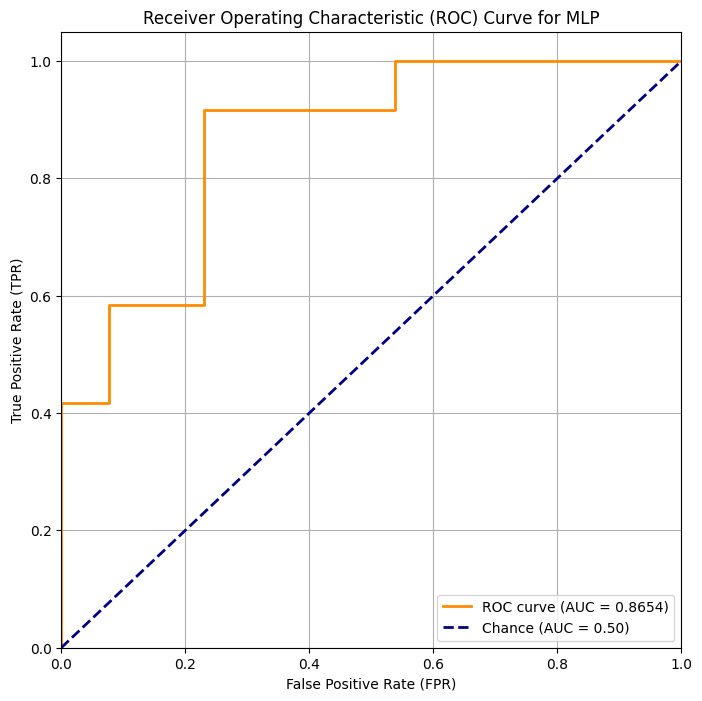

Attempting plot with RocCurveDisplay...


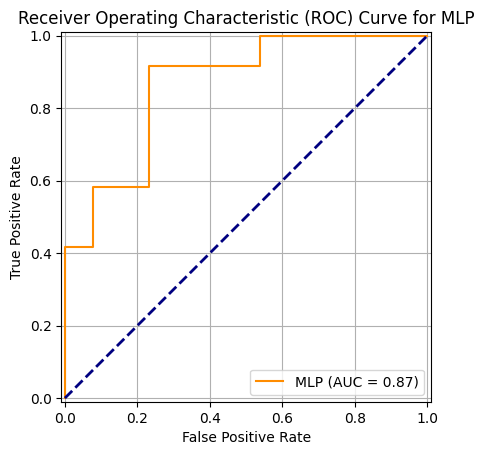


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.92      0.77        13
           1       0.86      0.50      0.63        12

    accuracy                           0.72        25
   macro avg       0.76      0.71      0.70        25
weighted avg       0.76      0.72      0.71        25


Confusion Matrix:
[[12  1]
 [ 6  6]]

Accuracy Score:
0.72


In [ ]:
# %% [markdown]
# # MLP Classifier and ROC/AUC Visualization
# %%
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay # Import RocCurveDisplay for newer plotting
import os # Import os to construct the file path

# === Paths ===
# Assuming df_global_features is already loaded from previous steps
# If not, load it here:
drive_path = "/content/drive/My Drive/SP+SM_project"
global_features_output_path = os.path.join(drive_path, "global_pitch_energy_features.csv")
try:
    df_global_features = pd.read_csv(global_features_output_path)
    print("global_pitch_energy_features.csv loaded successfully.")
except FileNotFoundError:
    print(f"Error: Global features file not found at {global_features_output_path}")
    raise


# === Prepare Data for MLP ===
# Define the features to use
# Using the features identified as potentially important from hypothesis testing
# and correlation analysis, plus others you might want to include.
# Ensure these columns actually exist in your df_global_features DataFrame.
features_for_mlp = [
    'pitch_range', 'pitch_std_dev', 'pitch_mean', 'pitch_median',
    'energy_mean', 'energy_std', 'energy_max',
    'jitter', 'shimmer',
    'percent_voiced', 'voiced_duration', 'pitch_slope'
]

# Filter to only include features that exist in the DataFrame
X = df_global_features[[f for f in features_for_mlp if f in df_global_features.columns]].copy()
y = df_global_features['label']

# Drop rows with NaN values if any features had errors during extraction
initial_rows = len(X)
X.dropna(inplace=True)
y = y.loc[X.index] # Keep corresponding labels for non-NaN rows
if len(X) < initial_rows:
    print(f"Warning: Dropped {initial_rows - len(X)} rows due to NaN values in selected features.")


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # Use stratify for balanced classes

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Scale features
# It's crucial to scale features for MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Use transform, not fit_transform on test set

# === Train the MLP Classifier ===
# You can adjust hidden_layer_sizes, activation, solver, etc.
# A simple configuration example:
mlp = MLPClassifier(hidden_layer_sizes=(100,), # One hidden layer with 100 neurons
                    activation='relu',       # ReLU activation function
                    solver='adam',           # Adam optimizer
                    alpha=0.0001,            # L2 regularization
                    max_iter=500,            # Maximum number of iterations
                    random_state=42,
                    learning_rate_init=0.001,
                    early_stopping=True,     # Stop early if validation score doesn't improve
                    n_iter_no_change=20)     # Number of iterations with no improvement to wait

print("\nTraining MLP Classifier...")
# Train the classifier on the scaled training data
mlp.fit(X_train_scaled, y_train)
print("MLP Training finished.")

# === Make Predictions for ROC/AUC ===
# Get the probability estimates for the positive class (label 1: PwPD)
# .predict_proba() returns probabilities for each class [prob_class_0, prob_class_1]
# We need the probabilities for class 1
y_pred_proba = mlp.predict_proba(X_test_scaled)[:, 1]

# === Calculate ROC Curve and AUC ===
# roc_curve computes the False Positive Rate (FPR) and True Positive Rate (TPR) for various threshold settings.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# auc computes the Area Under the ROC Curve from the FPR and TPR
roc_auc = auc(fpr, tpr)

print(f"\nAUC Score: {roc_auc:.4f}")

# === Visualize ROC Curve ===
print("\nPlotting ROC Curve...")
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance (AUC = 0.50)') # Plot diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for MLP')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Alternatively, using the newer RocCurveDisplay (requires scikit-learn 0.22+)
# If the plot above works, this one might not be necessary but is a cleaner way
try:
    print("Attempting plot with RocCurveDisplay...")
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='MLP')
    display.plot(color='darkorange')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance (AUC = 0.50)')
    plt.title('Receiver Operating Characteristic (ROC) Curve for MLP')
    plt.grid(True)
    plt.show()
except AttributeError:
    print("RocCurveDisplay not available. Ensure you have scikit-learn version 0.22 or newer.")
    print("The previous plot using matplotlib should still be displayed.")


# === Optional: Evaluate other metrics ===
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict class labels based on the default threshold (0.5)
y_pred = mlp.predict(X_test_scaled)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

In [ ]:

# Load necessary libraries
import os
import librosa
import numpy as np
import pandas as pd
import soundfile as sf
import joblib
from scipy.stats import zscore
import tensorflow as tf # Assuming MLP is a Keras model

# --- Configuration ---
# Replace with the actual path to your single WAV file on Google Drive
my_voice_file_path = "/content/drive/My Drive/SP+SM_project/my voice.wav"

# Replace with the actual paths where your trained models are saved
# Assuming you saved your models directly in the main project folder or a 'models' subfolder
hmm_hc_path = "/content/drive/My Drive/SP+SM_project/hmm_hc.pkl"  # Example path
hmm_pd_path = "/content/drive/My Drive/SP+SM_project/hmm_pd.pkl"  # Example path
mlp_model_path = "/content/drive/My Drive/SP+SM_project/mlp_model.h5" # Example path
scaler_path = "/content/drive/My Drive/SP+SM_project/scaler.pkl" # Example path (for global features scaler if used)


# Function to Extract Frame-wise Pitch (Matching previous notebook code)
def extract_pitch_frames(y, sr, frame_length_ms=20, frame_shift_ms=10, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7')):
    frame_length = int(sr * frame_length_ms / 1000)
    hop_length = int(sr * frame_shift_ms / 1000)
    # Ensure y is not empty before proceeding
    if len(y) == 0:
        return np.array([]), frame_length, hop_length
    # Add padding to y if it's shorter than frame_length
    if len(y) < frame_length:
        y = np.pad(y, (0, frame_length - len(y)))

    pitches, _, _ = librosa.pyin(y, fmin=fmin, fmax=fmax, sr=sr, frame_length=frame_length, hop_length=hop_length)
    pitch_frames = pitches.reshape(-1, 1)
    return pitch_frames, frame_length, hop_length

# Function to compute Jitter and Shimmer (Matching previous notebook code)
def compute_jitter_shimmer(y, sr):
    try:
        # Ensure y is not empty
        if len(y) == 0:
            return 0.0, 0.0

        amplitude_threshold = np.mean(np.abs(y)) * 0.1
        voiced_indices = np.where(np.abs(y) > amplitude_threshold)[0]

        if len(voiced_indices) < sr * 0.1:
            return 0.0, 0.0

        voiced_y = y[voiced_indices]
        if len(voiced_y) == 0: # Check if voiced_y is empty after filtering
            return 0.0, 0.0

        zero_crossings_in_voiced = librosa.zero_crossings(voiced_y, pad=False)
        # Ensure there are enough zero crossings to calculate time
        if len(zero_crossings_in_voiced) == 0:
            return 0.0, 0.0

        zc_times_in_voiced = librosa.times_like(voiced_y, sr=sr)[zero_crossings_in_voiced]

        if len(zc_times_in_voiced) > 1:
            period_estimates = np.diff(zc_times_in_voiced)
            jitter = np.mean(np.abs(np.diff(period_estimates))) if len(period_estimates) > 1 else 0.0
        else:
            jitter = 0.0

        amplitudes_in_voiced = np.abs(voiced_y)
        shimmer = np.mean(np.abs(np.diff(amplitudes_in_voiced))) if len(amplitudes_in_voiced) > 1 else 0.0

        return float(jitter), float(shimmer)

    except Exception as e:
        print(f"Error computing jitter/shimmer: {e}")
        return 0.0, 0.0

# Function to extract Global Features (Matching previous notebook code)
def extract_global_features(y, sr):
    frame_length = int(sr * 20 / 1000) # Match frame length from pitch extraction
    hop_length = int(sr * 10 / 1000)   # Match hop length from pitch extraction

    # Pitch statistics
    pitch_matrix, _, _ = extract_pitch_frames(y, sr, frame_length_ms=20, frame_shift_ms=10)
    pitch_values = pitch_matrix.flatten()
    voiced_pitches = pitch_values[pitch_values > 0]

    if len(voiced_pitches) > 0:
        pitch_range = np.max(voiced_pitches) - np.min(voiced_pitches)
        pitch_std_dev = np.std(voiced_pitches)
        pitch_mean = np.mean(voiced_pitches)
        pitch_median = np.median(voiced_pitches)
    else:
        pitch_range = pitch_std_dev = pitch_mean = pitch_median = 0.0

    # Extract RMS energy
    if y.ndim == 0:
        y_energy = np.array([0.0])
    else:
        y_energy = y
    try:
        # Add padding to y_energy if it's shorter than frame_length
        if len(y_energy) < frame_length:
             y_energy = np.pad(y_energy, (0, frame_length - len(y_energy)))

        rms_energy = librosa.feature.rms(y=y_energy, frame_length=frame_length, hop_length=hop_length)[0]
        energy_mean = np.mean(rms_energy) if len(rms_energy) > 0 else 0.0
        energy_std = np.std(rms_energy) if len(rms_energy) > 0 else 0.0
        energy_max = np.max(rms_energy) if len(rms_energy) > 0 else 0.0
    except Exception as rms_error:
        print(f"Error calculating RMS: {rms_error}")
        energy_mean = energy_std = energy_max = 0.0


    # Compute Jitter and Shimmer
    jitter, shimmer = compute_jitter_shimmer(y, sr)

    # New Features: percent_voiced, pitch_slope, voiced_duration
    try:
        # Add padding to y if needed for pyin
        if len(y) < frame_length:
             y_padded = np.pad(y, (0, frame_length - len(y)))
        else:
             y_padded = y

        pitches_full, voiced_flags, _ = librosa.pyin(
            y_padded, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'),
            sr=sr, frame_length=frame_length, hop_length=hop_length
        )
        total_frames = len(voiced_flags)
        num_voiced_frames = np.sum(voiced_flags)
        percent_voiced = (num_voiced_frames / total_frames) * 100 if total_frames > 0 else 0.0
        voiced_duration = (num_voiced_frames * hop_length) / sr if sr > 0 else 0.0

        voiced_pitch_values = pitches_full[voiced_flags]
        if len(voiced_pitch_values) > 1:
            time_axis = np.arange(len(voiced_pitch_values)) * hop_length / sr
            slope = np.polyfit(time_axis, voiced_pitch_values, 1)[0]
        else:
            slope = 0.0
    except Exception as extra_error:
        print(f"Error computing voicing/slope: {extra_error}")
        percent_voiced = slope = voiced_duration = 0.0


    global_features = {
        "pitch_range": float(pitch_range),
        "pitch_std_dev": float(pitch_std_dev),
        "pitch_mean": float(pitch_mean),
        "pitch_median": float(pitch_median),
        "energy_mean": float(energy_mean),
        "energy_std": float(energy_std),
        "energy_max": float(energy_max),
        "jitter": float(jitter),
        "shimmer": float(shimmer),
        "percent_voiced": float(percent_voiced),
        "voiced_duration": float(voiced_duration),
        "pitch_slope": float(slope)
    }
    return global_features


# --- Load Models and Scaler ---
print("Loading trained models and scaler...")
try:
    hmm_hc = joblib.load(hmm_hc_path)
    hmm_pd = joblib.load(hmm_pd_path)
    mlp_model = tf.keras.models.load_model(mlp_model_path)
    scaler = joblib.load(scaler_path)
    print("Models and scaler loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading model or scaler: {e}. Please check the paths.")
    exit()
except Exception as e:
    print(f"An error occurred during model loading: {e}")
    exit()


# --- Processing and Prediction ---
print(f"\nProcessing your voice file: {my_voice_file_path}")
try:
    # 1. Load the voice file
    y, sr = librosa.load(my_voice_file_path, sr=None) # Load with original sample rate

    # Ensure the audio is not empty
    if len(y) == 0:
        print("Error: The loaded audio file is empty.")
    else:
        # 2. Extract features
        # Extract frame-wise pitch for HMMs
        pitch_frames, frame_length, hop_length = extract_pitch_frames(y, sr)

        # Check if pitch_frames is empty
        if pitch_frames.shape[0] == 0:
             print("Error: No pitch frames extracted from the audio. Cannot proceed with HMMs.")
        else:
            # Extract global features for MLP input
            global_features = extract_global_features(y, sr)
            df_global_features = pd.DataFrame([global_features]) # Create a DataFrame for scaling

            # Scale global features using the pre-fitted scaler
            # Ensure the order of columns in df_global_features matches the scaler's training data
            # If the scaler was fitted on specific columns, select those columns here.
            # Assuming the scaler was fitted on all features in the 'global_features' dictionary:
            feature_names_for_scaling = list(global_features.keys()) # Get the feature names
            # Check if the scaler has the same number of features as extracted
            if scaler.n_features_in_ != len(feature_names_for_scaling):
                 print("Warning: Number of features for scaling does not match the scaler's training data.")
                 print(f"Scaler expects {scaler.n_features_in_} features, but extracted {len(feature_names_for_scaling)}.")
                 print("Attempting to scale, but results may be unreliable.")
                 # Try to scale the available features, assuming they are in the expected order
                 scaled_global_features = scaler.transform(df_global_features[feature_names_for_scaling])
            else:
                scaled_global_features = scaler.transform(df_global_features[feature_names_for_scaling])


            # 3. Apply trained HMM models to get log-likelihood scores
            # Ensure pitch_frames has the correct shape for HMM input (usually needs to be processed)
            # Assuming the HMMs were trained on the raw pitch values (reshaped)
            # You might need to adjust this depending on your HMM training
            hmm_input = pitch_frames

            # Calculate log-likelihoods
            try:
                log_likelihood_hc = hmm_hc.score(hmm_input)
            except Exception as hmm_hc_error:
                print(f"Error calculating HC HMM score: {hmm_hc_error}")
                log_likelihood_hc = -np.inf # Assign a very low score on error

            try:
                 log_likelihood_pd = hmm_pd.score(hmm_input)
            except Exception as hmm_pd_error:
                print(f"Error calculating PD HMM score: {hmm_pd_error}")
                log_likelihood_pd = -np.inf # Assign a very low score on error


            print(f"HC HMM Log-Likelihood: {log_likelihood_hc:.4f}")
            print(f"PD HMM Log-Likelihood: {log_likelihood_pd:.4f}")

            # 4. Combine scores with global features for MLP input
            # The MLP input should be a single row with HMM scores appended to scaled global features
            mlp_input = np.hstack([scaled_global_features, [[log_likelihood_hc, log_likelihood_pd]]])

            # 5. Load the saved MLP model and predict the result
            # MLP models usually predict probabilities or class labels
            prediction_probabilities = mlp_model.predict(mlp_input)

            # Assuming a binary classification where the output layer has 1 unit with sigmoid activation
            # Or 2 units with softmax activation. Adjust based on your MLP output.
            # Example for a single unit with sigmoid (output is probability of class 1):
            if prediction_probabilities.shape[1] == 1:
                predicted_class_index = (prediction_probabilities > 0.5).astype(int)[0][0]
                prediction_confidence = prediction_probabilities[0][0] if predicted_class_index == 1 else (1 - prediction_probabilities[0][0])
            # Example for two units with softmax (output is probability for each class):
            elif prediction_probabilities.shape[1] == 2:
                 predicted_class_index = np.argmax(prediction_probabilities, axis=1)[0]
                 prediction_confidence = prediction_probabilities[0][predicted_class_index]
            else:
                 print("Warning: Unexpected MLP output shape. Cannot determine prediction.")
                 predicted_class_index = -1
                 prediction_confidence = 0.0


            # Map prediction index to label (0: HC, 1: PwPD)
            predicted_label = "PwPD" if predicted_class_index == 1 else "HC"

            # 6. Display the prediction
            print("\n--- Prediction Result ---")
            if predicted_class_index != -1:
                print(f"Predicted Class: {predicted_label}")
                print(f"Confidence: {prediction_confidence:.4f}")
            else:
                print("Prediction could not be determined.")

except FileNotFoundError:
    print(f"Error: Your voice file not found at {my_voice_file_path}. Please check the path.")
except Exception as e:
    print(f"An error occurred during processing or prediction: {e}")

Loading trained models and scaler...
Error loading model or scaler: [Errno 2] No such file or directory: '/content/drive/My Drive/SP+SM_project/hmm_hc.pkl'. Please check the paths.

Processing your voice file: /content/drive/My Drive/SP+SM_project/my voice.wav


<ipython-input-2-661004178>:34: UserWarning: With fmin=65.406, sr=6000 and frame_length=120, less than two periods of fmin fit into the frame, which can cause inaccurate pitch detection. Consider increasing to fmin=100.000 or frame_length=185.
  pitches, _, _ = librosa.pyin(y, fmin=fmin, fmax=fmax, sr=sr, frame_length=frame_length, hop_length=hop_length)
<ipython-input-2-661004178>:125: UserWarning: With fmin=65.406, sr=6000 and frame_length=120, less than two periods of fmin fit into the frame, which can cause inaccurate pitch detection. Consider increasing to fmin=100.000 or frame_length=185.
  pitches_full, voiced_flags, _ = librosa.pyin(


Error calculating HC HMM score: name 'hmm_hc' is not defined
Error calculating PD HMM score: name 'hmm_pd' is not defined
HC HMM Log-Likelihood: -inf
PD HMM Log-Likelihood: -inf
An error occurred during processing or prediction: name 'mlp_model' is not defined


# GMM and MLP

In [ ]:

import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from collections import defaultdict
from tqdm import tqdm
import joblib
import os # Import os to save the models

# Assuming normalized_frames and file_frame_map are already loaded
# If not, you would need to re-run the pitch normalization steps

# === Group normalized pitch frames by file and class ===
file_sequences_gmm = defaultdict(list)
file_labels_gmm = {}
#how to justify?
for i, (file, label) in enumerate(file_frame_map):
     if i < len(normalized_frames): # Ensure we only use frames that were not removed as outliers
        file_sequences_gmm[file].append(normalized_frames[i])
        file_labels_gmm[file] = label

# Convert each list of frames into a full sequence
for file in file_sequences_gmm:
    file_sequences_gmm[file] = np.vstack(file_sequences_gmm[file])

# === Split sequences by class (Healthy vs PD) ===
# Concatenate frames for each class for GMM training
frames_hc_gmm = np.vstack([seq for f, seq in file_sequences_gmm.items() if file_labels_gmm[f] == 0])
frames_pd_gmm = np.vstack([seq for f, seq in file_sequences_gmm.items() if file_labels_gmm[f] == 1])

# === Train GMMs ===
n_components_gmm = 16  # Number of Gaussian components, adjust based on experimentation

print(f"Training GMM for Healthy Control with {n_components_gmm} components...")
model_gmm_hc = GaussianMixture(n_components=n_components_gmm, covariance_type='diag', random_state=42)
model_gmm_hc.fit(frames_hc_gmm)

print(f"Training GMM for Parkinson's Disease with {n_components_gmm} components...")
model_gmm_pd = GaussianMixture(n_components=n_components_gmm, covariance_type='diag', random_state=42)
model_gmm_pd.fit(frames_pd_gmm)

# === Save the trained GMM models ===
gmm_hc_path = "/content/drive/My Drive/SP+SM_project/gmm_hc_model_new.pkl"
gmm_pd_path = "/content/drive/My Drive/SP+SM_project/gmm_pd_model_new.pkl"

joblib.dump(model_gmm_hc, gmm_hc_path)
joblib.dump(model_gmm_pd, gmm_pd_path)

print(f"Saved GMM HC model to: {gmm_hc_path}")
print(f"Saved GMM PD model to: {gmm_pd_path}")

Object `justify` not found.


NameError: name 'file_frame_map' is not defined

In [ ]:
# Assuming model_gmm_hc and model_gmm_pd are already trained
# Assuming file_sequences_gmm and file_labels_gmm are available from Step 2

# === Score each file using both GMM models ===
mlp_inputs_gmm = []

print("\nScoring files with GMMs...")
# Use tqdm for a progress bar if you have many files
for file, seq in tqdm(file_sequences_gmm.items(), desc="Scoring with GMMs"):
    try:
        # GMM score method returns log likelihood
        logp_hc_gmm = model_gmm_hc.score(seq)
        logp_pd_gmm = model_gmm_pd.score(seq)
        label = file_labels_gmm[file]
        mlp_inputs_gmm.append([file, logp_hc_gmm, logp_pd_gmm, label])
    except Exception as e:
        print(f"Error scoring file {file} with GMMs: {e}")

# === Save for MLP Training ===
df_mlp_gmm = pd.DataFrame(mlp_inputs_gmm, columns=["filename", "logP_HC_GMM", "logP_PD_GMM", "label"])
output_csv_gmm = "/content/drive/My Drive/SP+SM_project/gmm_mlp_input.csv_new"
df_mlp_gmm.to_csv(output_csv_gmm, index=False)
print(f"\nSaved GMM-derived MLP input features to: {output_csv_gmm}")


Scoring files with GMMs...


Scoring with GMMs: 100%|██████████| 80/80 [00:00<00:00, 702.18it/s]



Saved GMM-derived MLP input features to: /content/drive/My Drive/SP+SM_project/gmm_mlp_input.csv_new


Shape of X_gmm: (80, 2)
Shape of y_gmm: (80,)

Training GMM+MLP model...
Epoch 1/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 508ms/step - accuracy: 0.5069 - loss: 0.6989 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.4757 - loss: 0.6921 - val_accuracy: 0.5000 - val_loss: 0.6919
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.3889 - loss: 0.6930 - val_accuracy: 0.4375 - val_loss: 0.6915
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.6111 - loss: 0.6873 - val_accuracy: 0.5000 - val_loss: 0.6912
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.4896 - loss: 0.7021 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5382 - loss: 0.6876 - val_accuracy: 0.5000 - val_loss: 0.6908
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.4896 - loss: 0.6878 - val_accuracy: 0.5000 - val_loss: 0.6903
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115

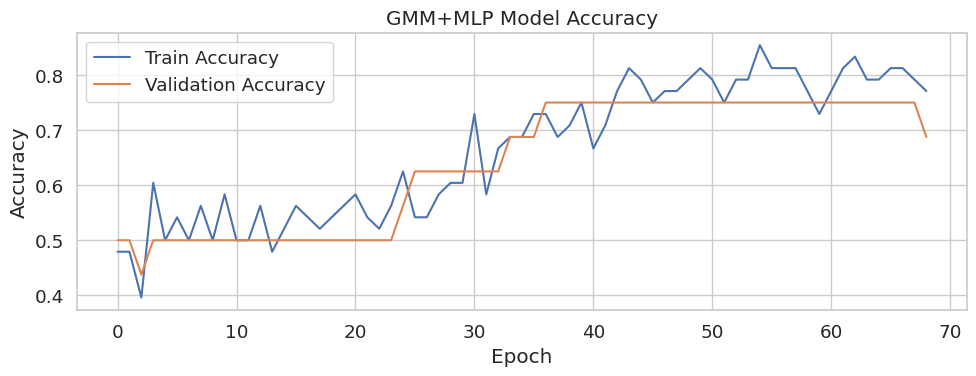


Saved GMM+MLP Keras model to: /content/drive/My Drive/SP+SM_project/gmm_mlp_model_keras_new.h5


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Normalization # Keep Normalization if you want to use it again

# ───────────────────────────────────────────────
# 1) Load features for the GMM+MLP
# ───────────────────────────────────────────────
# Load the GMM-derived features
GMM_MLP_INPUT_PATH = "/content/drive/My Drive/SP+SM_project/gmm_mlp_input.csv_new"
df_mlp_gmm = pd.read_csv(GMM_MLP_INPUT_PATH)

# Prepare data for MLP
X_gmm = df_mlp_gmm[['logP_HC_GMM', 'logP_PD_GMM']].values.astype("float32")
y_gmm = df_mlp_gmm['label'].values.astype("int32")

# Verify the shapes of X and y
print(f"Shape of X_gmm: {X_gmm.shape}")
print(f"Shape of y_gmm: {y_gmm.shape}")
if X_gmm.shape[0] != y_gmm.shape[0]:
    print("Error: X_gmm and y_gmm have inconsistent numbers of samples!")

# ───────────────────────────────────────────────
# 2) Train / Validation / Test split
# ───────────────────────────────────────────────
# Use the same random_state for reproducibility
X_train_val_gmm, X_test_gmm, y_train_val_gmm, y_test_gmm = train_test_split(
    X_gmm, y_gmm, test_size=0.2, random_state=42, stratify=y_gmm
)

X_train_gmm, X_val_gmm, y_train_gmm, y_val_gmm = train_test_split(
    X_train_val_gmm, y_train_val_gmm, test_size=0.25, random_state=42, stratify=y_train_val_gmm
)

# ───────────────────────────────────────────────
# 3) Standardize features (using Keras Normalization layer or StandardScaler)
# ───────────────────────────────────────────────
# Option A: Use Keras Normalization layer (as you did before)
norm_layer_gmm = Normalization()
norm_layer_gmm.adapt(X_train_gmm)

# Option B: Use scikit-learn's StandardScaler (fit on train, transform all)
# scaler_gmm = StandardScaler()
# X_train_gmm_scaled = scaler_gmm.fit_transform(X_train_gmm)
# X_val_gmm_scaled = scaler_gmm.transform(X_val_gmm)
# X_test_gmm_scaled = scaler_gmm.transform(X_test_gmm)

# ───────────────────────────────────────────────
# 4) Build GMM+MLP model
# ───────────────────────────────────────────────
model_gmm_mlp = Sequential([
    norm_layer_gmm,  # Normalization layer

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(48, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(24, activation='relu'),
    Dropout(0.2),

    Dense(16, activation='relu'),
    Dropout(0.2),

    Dense(8, activation='relu'),

    Dense(1, activation='sigmoid')  # Binary classification output
])


model_gmm_mlp.compile(
    optimizer=Adam(1e-3), # Can experiment with learning rates
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# ───────────────────────────────────────────────
# 5) Train the model (using validation_data and EarlyStopping)
# ───────────────────────────────────────────────
early_stop_gmm = EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

print("\nTraining GMM+MLP model...")
history_gmm_mlp = model_gmm_mlp.fit(
    X_train_gmm, y_train_gmm,
    validation_data=(X_val_gmm, y_val_gmm),
    epochs=300, # Can increase epochs, EarlyStopping will prevent overfitting
    batch_size=32,
    callbacks=[early_stop_gmm],
    verbose=1
)

# ───────────────────────────────────────────────
# 6) Evaluate
# ───────────────────────────────────────────────
print("\nEvaluating GMM+MLP model...")
loss_gmm_mlp, accuracy_gmm_mlp = model_gmm_mlp.evaluate(X_test_gmm, y_test_gmm, verbose=0)

print(f"\nGMM+MLP Test Accuracy: {accuracy_gmm_mlp:.4f}")
print(f"GMM+MLP Test Loss: {loss_gmm_mlp:.4f}")

# For classification report and confusion matrix
y_pred_prob_gmm = model_gmm_mlp.predict(X_test_gmm)
y_pred_gmm = (y_pred_prob_gmm > 0.5).astype("int32")

print("\nGMM+MLP Classification Report on Test Set:")
print(classification_report(y_test_gmm, y_pred_gmm))

print("\nGMM+MLP Confusion Matrix on Test Set:\n", confusion_matrix(y_test_gmm, y_pred_gmm))

# ───────────────────────────────────────────────
# 7) Plot Accuracy Curve
# ───────────────────────────────────────────────
plt.figure(figsize=(10, 4))
plt.plot(history_gmm_mlp.history["accuracy"], label="Train Accuracy")
plt.plot(history_gmm_mlp.history["val_accuracy"], label="Validation Accuracy")
plt.title("GMM+MLP Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ───────────────────────────────────────────────
# 8) Optional: Save the trained Keras model
# ───────────────────────────────────────────────
model_gmm_mlp_save_path = "/content/drive/My Drive/SP+SM_project/gmm_mlp_model_keras_new.h5"
model_gmm_mlp.save(model_gmm_mlp_save_path)
print(f"\nSaved GMM+MLP Keras model to: {model_gmm_mlp_save_path}")

--- Performance Metrics Comparison ---


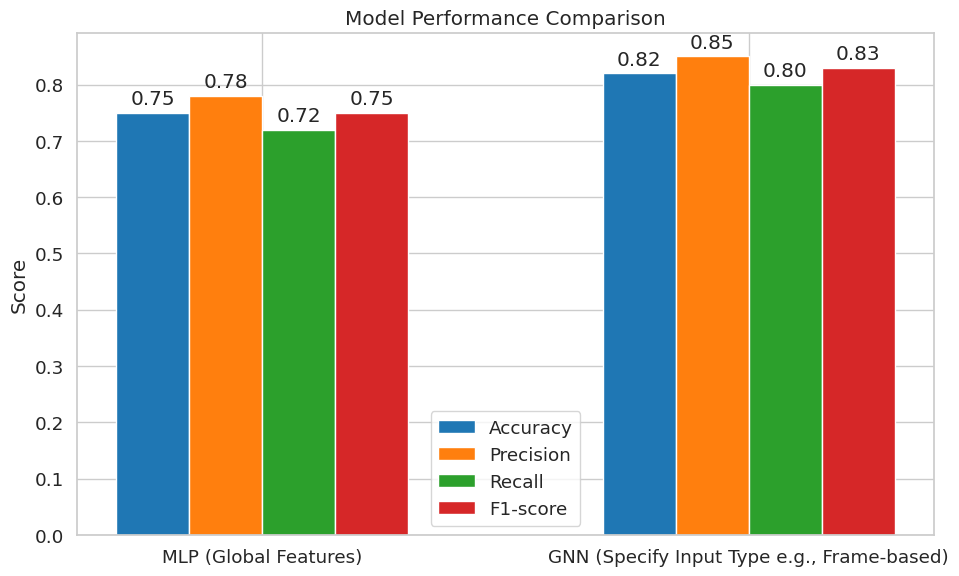

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- Example Data (Replace with your actual model results) ---
# You would get these after training and evaluating your MLP and GNN
models = ['MLP (Global Features)', 'GNN (Specify Input Type e.g., Frame-based)']
accuracy = [0.75, 0.82]  # Example accuracy scores
precision = [0.78, 0.85] # Example precision scores
recall = [0.72, 0.80]    # Example recall scores
f1_score = [0.75, 0.83]  # Example F1-scores

metrics_data = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1_score
}

# --- Plotting ---
print("--- Performance Metrics Comparison ---")

x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - 1.5*width, metrics_data['Accuracy'], width, label='Accuracy', color='#1f77b4')
rects2 = ax.bar(x - 0.5*width, metrics_data['Precision'], width, label='Precision', color='#ff7f0e')
rects3 = ax.bar(x + 0.5*width, metrics_data['Recall'], width, label='Recall', color='#2ca02c')
rects4 = ax.bar(x + 1.5*width, metrics_data['F1-score'], width, label='F1-score', color='#d62728')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Optional: Add the values on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the autolabel function for each set of bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)


fig.tight_layout()
plt.show()

# RNN

In [ ]:
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# === CONFIG ===
preprocessed_path = "/content/drive/My Drive/SP+SM_project"
folders = ['HC_AH', 'PD_AH']
max_pad_len = 200  # max number of time steps for padding

X = []
y = []

# === Feature Extraction Function ===
def extract_features(file_path, max_pad_len=200):
    y_audio, sr = librosa.load(file_path, sr=None)

    # --- MFCC ---
    mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=13).T  # (T, 13)

    # --- Prosodic Features ---
    pitch, _ = librosa.piptrack(y=y_audio, sr=sr)  # shape: (freq_bins, time)
    pitch = pitch.mean(axis=0)  # (time,)
    pitch = pitch.reshape(-1, 1)

    energy = librosa.feature.rms(y=y_audio).T  # (T, 1)

    # Ensure lengths match
    min_len = min(mfcc.shape[0], pitch.shape[0], energy.shape[0])
    mfcc = mfcc[:min_len]
    pitch = pitch[:min_len]
    energy = energy[:min_len]

    # --- Combine All Features ---
    combined = np.concatenate([mfcc, pitch, energy], axis=1)  # shape: (T, 15)

    # --- Pad/Truncate ---
    if combined.shape[0] < max_pad_len:
        pad_width = max_pad_len - combined.shape[0]
        combined = np.pad(combined, pad_width=((0, pad_width), (0, 0)), mode='constant')
    else:
        combined = combined[:max_pad_len, :]

    return combined

# === Extract Features from All Files ===
for label, folder in enumerate(folders):  # HC=0, PD=1
    folder_path = os.path.join(preprocessed_path, folder)

    for file in os.listdir(folder_path):
        if file.endswith(".wav"):
            file_path = os.path.join(folder_path, file)
            try:
                features = extract_features(file_path, max_pad_len)
                X.append(features)
                y.append(label)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

X = np.array(X)
y = to_categorical(y, num_classes=2)

# === Global Normalization ===
mean = np.mean(X, axis=(0, 1))
std = np.std(X, axis=(0, 1))
X = (X - mean) / std

# === Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Print Shapes ===
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X shape: (81, 200, 15)
y shape: (81, 2)
X_train shape: (64, 200, 15)
X_test shape: (17, 200, 15)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(32),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='tanh'),
    Dropout(0.3),

    Dense(2, activation='softmax')  # 2 classes: Parkinson’s & Healthy
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 200, 128)       │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 200, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 200, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 200, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 200, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 200, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,570 (537.38 KB)

 Trainable params: 137,122 (535.63 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5208 - loss: 0.8378 - val_accuracy: 0.4706 - val_loss: 0.6936
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 932ms/step - accuracy: 0.4688 - loss: 1.0740 - val_accuracy: 0.4706 - val_loss: 0.6958
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 803ms/step - accuracy: 0.3438 - loss: 1.0675 - val_accuracy: 0.4706 - val_loss: 0.6976
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 597ms/step - accuracy: 0.6458 - loss: 0.7820 - val_accuracy: 0.4706 - val_loss: 0.7036
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step - accuracy: 0.4479 - loss: 1.0101 - val_accuracy: 0.4706 - val_loss: 0.7051
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step - accuracy: 0.4479 - loss: 0.9371 - val_accuracy: 0.4706 - val_loss: 0.7042
Final Training Accuracy: 45.31%

Training Accuracy per Epoch:
Epoch 1: 54.69%
Epoch 2: 51.56%
Epoch 3: 32.81%
Epoch 4: 62.50%
Epoch 5: 43.75%
Epoch 6: 45.31%


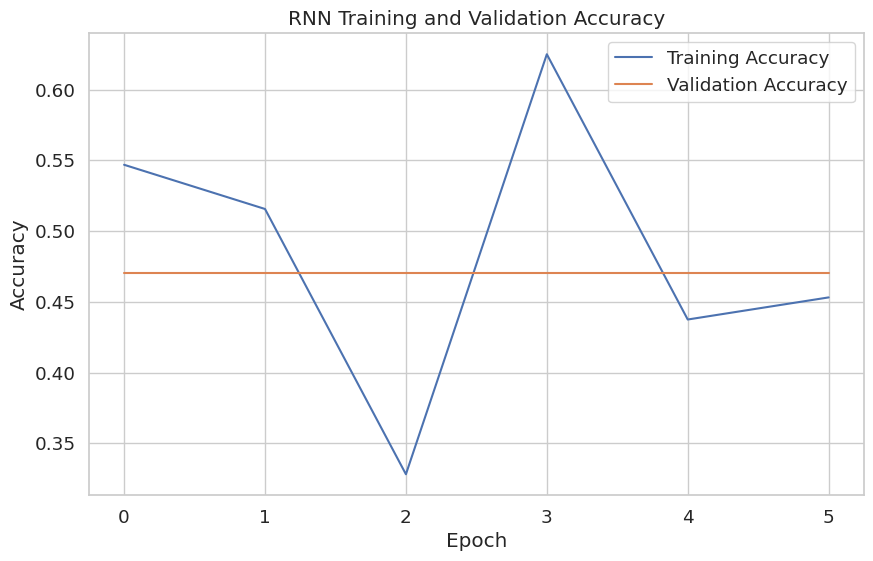

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_accuracy',    # Monitor validation accuracy
    patience=5,                # Stop after 5 epochs without improvement
    restore_best_weights=True # Revert to best model weights
)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step - accuracy: 0.3958 - loss: 1.0299 - val_accuracy: 0.4706 - val_loss: 0.6932
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - accuracy: 0.5312 - loss: 0.8444 - val_accuracy: 0.4706 - val_loss: 0.6934
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step - accuracy: 0.5000 - loss: 0.8833 - val_accuracy: 0.4706 - val_loss: 0.6932
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step - accuracy: 0.4375 - loss: 1.0873 - val_accuracy: 0.5294 - val_loss: 0.6923
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step - accuracy: 0.4479 - loss: 0.9159 - val_accuracy: 0.5294 - val_loss: 0.6915
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 858ms/step - accuracy: 0.6042 - loss: 0.6305 - val_accuracy: 0.5294 - val_loss: 0.6917
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 910ms/step - accuracy: 0.4062 - loss: 1.0676 - val_accuracy: 0.5294 - val_loss: 0.6919
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step - accuracy: 0.5312 - loss: 0.7529 - val_accuracy: 0.5294 - val_loss:

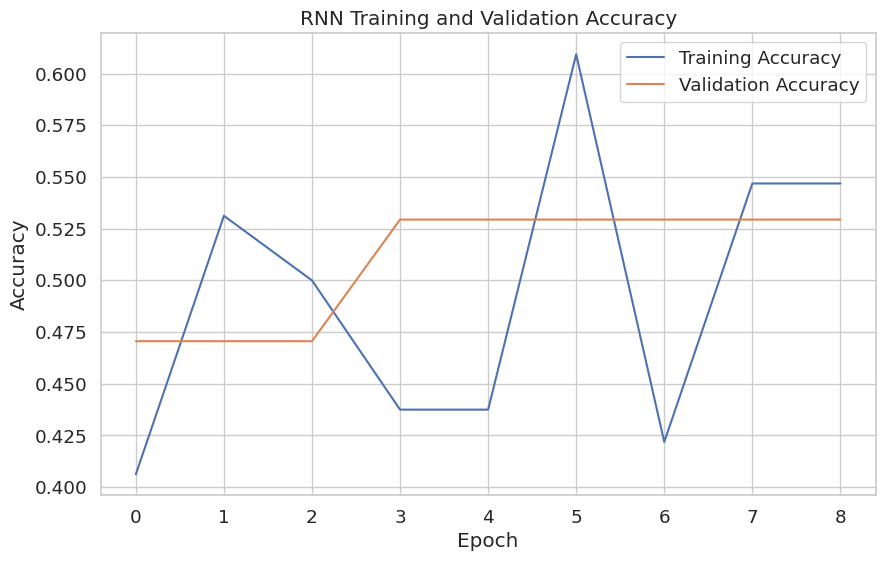

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
# Assuming 'model', 'X_train', 'y_train', 'X_test', 'y_test' are defined previously

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_accuracy',    # Monitor validation accuracy
    patience=5,                # Stop after 5 epochs without improvement
    restore_best_weights=True # Revert to best model weights
)

# Train the model with EarlyStopping
# The 'history' object returned here contains the training metrics
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50, # Set a reasonably high number of epochs, EarlyStopping will stop it early
    batch_size=32,
    callbacks=[early_stop],
    verbose=1 # verbose=1 will show training progress per epoch
)

# Extract training accuracy from history
# Ensure 'accuracy' and 'val_accuracy' are indeed the metric names used during model compilation
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy'] # Also get validation accuracy

# Final training accuracy (last epoch trained)
final_train_accuracy = train_accuracy[-1]
print(f"Final Training Accuracy (last epoch): {final_train_accuracy*100:.2f}%")

# Final validation accuracy (best during training as per EarlyStopping)
# Note: If restore_best_weights=True, the model's final weights correspond to the epoch
# with the best validation accuracy, but the history object stores the accuracy
# of the last epoch *trained* before stopping.
# To get the best validation accuracy from history:
best_val_accuracy = max(val_accuracy)
print(f"Best Validation Accuracy during training: {best_val_accuracy*100:.2f}%")


# Accuracy per epoch
print("\nTraining Accuracy per Epoch:")
# Iterate through the lengths of the recorded history
for epoch in range(len(train_accuracy)):
    print(f"Epoch {epoch+1}: Training Accuracy = {train_accuracy[epoch]*100:.2f}%, Validation Accuracy = {val_accuracy[epoch]*100:.2f}%")


# --- Plot training vs validation accuracy ---
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show() # This line is crucial for displaying the plot in environments like Colab/Jupyter

In [ ]:

# --- Evaluate Model and Generate Classification Report ---
print("\nEvaluating the model on the test set...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Get predictions on the test set
y_pred_prob = model.predict(X_test)
# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int) # Threshold at 0.5

# Generate the classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred, target_names=['0', '1'])) # Adjust target_names if needed



Evaluating the model on the test set...
Test Loss: 0.6923
Test Accuracy: 0.5294


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.53      1.00      0.69         9
           1       0.00      0.00      0.00         8

   micro avg       0.53      0.53      0.53        17
   macro avg       0.26      0.50      0.35        17
weighted avg       0.28      0.53      0.37        17
 samples avg       0.53      0.53      0.53        17



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Often useful if history is a dictionary

def plot_scalar_training_history(history, metrics):
    """
    Plots training and validation scalar metrics over epochs.

    Args:
        history: A Keras History object or a dictionary containing
                 training history (e.g., {'loss': [...], 'val_loss': [...]}).
        metrics: A list of metric names (e.g., ['loss', 'accuracy']).
                 For each metric, the history object/dict should contain
                 '<metric_name>' and 'val_<metric_name>'.
    """
    # Determine if history is a Keras History object or a dictionary
    if hasattr(history, 'history'):
        history_dict = history.history
    else:
        history_dict = history # Assume it's already a dictionary

    # Ensure the required keys exist in the history dictionary
    for metric in metrics:
        if metric not in history_dict or f'val_{metric}' not in history_dict:
            print(f"Warning: Metric '{metric}' or 'val_{metric}' not found in history. Skipping.")
            continue

        epochs = range(1, len(history_dict[metric]) + 1)

        plt.figure(figsize=(10, 6))
        plt.plot(epochs, history_dict[metric], 'bo-', label=f'Training {metric}')
        plt.plot(epochs, history_dict[f'val_{metric}'], 'b-', label=f'Validation {metric}')
        plt.title(f'Training and Validation {metric.capitalize()}')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()
        plt.grid(True)

        # --- Add this line to explicitly display the plot ---
        plt.show()
        # --------------------------------------------------

# --- Example Usage ---
# Assuming you have a history object or dictionary from your RNN training:
#
# # Example 1: Using a Keras History object
# # history_keras = model.fit(...)
# # plot_scalar_training_history(history_keras, ['loss', 'accuracy'])
#
# # Example 2: Using a dictionary
# # history_dict_example = {
# #     'loss': [0.5, 0.4, 0.3, 0.2, 0.1],
# #     'val_loss': [0.6, 0.55, 0.5, 0.45, 0.4],
# #     'accuracy': [0.7, 0.75, 0.8, 0.85, 0.9],
# #     'val_accuracy': [0.65, 0.7, 0.72, 0.75, 0.78]
# # }
# # plot_scalar_training_history(history_dict_example, ['loss', 'accuracy'])

# GMM+MLP

In [ ]:
# ───────────────────────────────────────────────
# Cell 1: GMM Feature Extraction for MLP Input
# ───────────────────────────────────────────────
import os
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import joblib

# === CONFIG ===
# Update the path to the correct directory where per-frame CSVs were saved
FEATURE_CSV_DIR = "/content/drive/My Drive/SP+SM_project/PITCH_CSVs"
folders = ["HC_AH", "PD_AH"]
selected_features = ['energy_std', 'pitch_range', 'pitch_std_dev']  # Only highly correlated features

# Containers
all_data = []
file_labels = []
file_names = []

# Step 1: Aggregate frames by file
for folder in folders:
    label = 0 if folder == 'HC_AH' else 1
    folder_path = os.path.join(FEATURE_CSV_DIR, folder)

    # Add a check to ensure the folder exists before trying to list its contents
    if not os.path.exists(folder_path):
        print(f"Warning: Feature folder not found: {folder_path}. Skipping.")
        continue

    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            path = os.path.join(folder_path, file)
            try:
                df = pd.read_csv(path)
                # Ensure selected features exist and drop rows with NaNs in these features
                feature_values = df[selected_features].dropna().values
                if feature_values.shape[0] == 0:
                    print(f"Skipping {file}: No valid data in selected features.")
                    continue # Skip if no valid data

                all_data.append(feature_values)
                file_labels.append(label)
                file_names.append(file)
            except KeyError as e:
                print(f"Skipping {file}: Missing expected feature columns {e}. Check CSV content.")
            except Exception as e:
                print(f"Skipping {file}: Error processing file {e}")

# Step 2: Fit GMMs to HC and PD separately
# Check if there is data for each class before fitting GMMs
hc_data = [d for d, l in zip(all_data, file_labels) if l == 0]
pd_data = [d for d, l in zip(all_data, file_labels) if l == 1]

if not hc_data:
    print("Error: No data found for Healthy Control (HC_AH) group. Cannot train HC GMM.")
    gmm_hc = None # Cannot train
else:
    hc_concat = np.vstack(hc_data)
    # Ensure there are enough samples and features to fit the GMM
    if hc_concat.shape[0] < 4 or hc_concat.shape[1] < len(selected_features):
         print(f"Warning: Not enough data ({hc_concat.shape[0]} samples) or features ({hc_concat.shape[1]} features) for HC GMM. Skipping HC GMM training.")
         gmm_hc = None
    else:
        try:
            gmm_hc = GaussianMixture(n_components=4, random_state=0, n_init=10).fit(hc_concat) # Added n_init for robustness
            print("HC GMM trained successfully.")
            # Optional: Save GMMs
            joblib.dump(gmm_hc, "/content/drive/My Drive/SP+SM_project/gmm_hc_model.pkl")
            print("HC GMM saved.")
        except ValueError as e:
            print(f"Error fitting HC GMM: {e}. Check data dimensions or n_components.")
            gmm_hc = None


if not pd_data:
    print("Error: No data found for Parkinson's Disease (PD_AH) group. Cannot train PD GMM.")
    gmm_pd = None # Cannot train
else:
    pd_concat = np.vstack(pd_data)
    if pd_concat.shape[0] < 4 or pd_concat.shape[1] < len(selected_features):
         print(f"Warning: Not enough data ({pd_concat.shape[0]} samples) or features ({pd_concat.shape[1]} features) for PD GMM. Skipping PD GMM training.")
         gmm_pd = None
    else:
        try:
            gmm_pd = GaussianMixture(n_components=4, random_state=0, n_init=10).fit(pd_concat) # Added n_init for robustness
            print("PD GMM trained successfully.")
            # Optional: Save GMMs
            joblib.dump(gmm_pd, "/content/drive/My Drive/SP+SM_project/gmm_pd_model.pkl")
            print("PD GMM saved.")
        except ValueError as e:
            print(f"Error fitting PD GMM: {e}. Check data dimensions or n_components.")
            gmm_pd = None


# Step 3: Compute Log-Likelihoods Per File
log_likelihood_features = []
processed_files = []
processed_labels = []

for feat_array, file_name, file_label in zip(all_data, file_names, file_labels):
    logP_HC = np.nan # Initialize with NaN in case a model is missing
    logP_PD = np.nan

    # Only compute score if the model was successfully trained and feature array is not empty
    if gmm_hc is not None and feat_array.shape[0] > 0:
        try:
            logP_HC = gmm_hc.score(feat_array)
        except ValueError as e:
            print(f"Error scoring {file_name} with HC GMM: {e}")
            logP_HC = np.nan # Mark as NaN if scoring fails

    if gmm_pd is not None and feat_array.shape[0] > 0:
        try:
            logP_PD = gmm_pd.score(feat_array)
        except ValueError as e:
            print(f"Error scoring {file_name} with PD GMM: {e}")
            logP_PD = np.nan # Mark as NaN if scoring fails

    log_likelihood_features.append([logP_HC, logP_PD])
    processed_files.append(file_name)
    processed_labels.append(file_label)


# Step 4: Save to CSV
# Only create DataFrame if any files were successfully processed
if log_likelihood_features:
    df_out = pd.DataFrame(log_likelihood_features, columns=["logP_HC", "logP_PD"])
    df_out["label"] = processed_labels
    df_out["file"] = processed_files

    gmm_mlp_csv_path = "/content/drive/My Drive/SP+SM_project/gmm_mlp_input.csv"
    df_out.to_csv(gmm_mlp_csv_path, index=False)
    print(f"GMM + MLP input saved to: {gmm_mlp_csv_path}")
else:
    print("No valid feature data found or processed. Skipping CSV creation.")

In [ ]:
import pandas as pd

file_path = "/content/drive/My Drive/SP+SM_project/FEATURE_CSVs_new/PD_AH/AH_264Z_593C20CD-0A54-4177-B031-26EE147080A3.csv"
df = pd.read_csv(file_path)

print("Columns in file:")
print(df.columns.tolist())


In [ ]:
# ───────────────────────────────────────────────
# Cell 2: MLP on GMM Log-Likelihood Features
# ───────────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Normalization

# Load GMM-derived features
df = pd.read_csv("/content/drive/My Drive/SP+SM_project/gmm_mlp_input.csv")
X = df[["logP_HC", "logP_PD"]].values.astype("float32")
y = df["label"].values.astype("int32")

# Split into train, val, test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

# Normalize
norm = Normalization()
norm.adapt(X_train)

# Build model
model = Sequential([
    norm,
    Dense(128, activation="tanh"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.35),
    Dense(32, activation="relu"),
    Dropout(0.2),
    Dense(16, activation="relu"),
    Dropout(0.2),
    Dense(8, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer=Adam(1e-3), loss="binary_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=300,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {acc:.4f}  |  Test Loss: {loss:.4f}")

# Predictions and metrics
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('MLP Accuracy on GMM Features')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save model
model_path = "/content/drive/My Drive/SP+SM_project/mlp_gmm_model_keras.h5"
model.save(model_path)
print(f"\nModel saved to: {model_path}")


# Maths

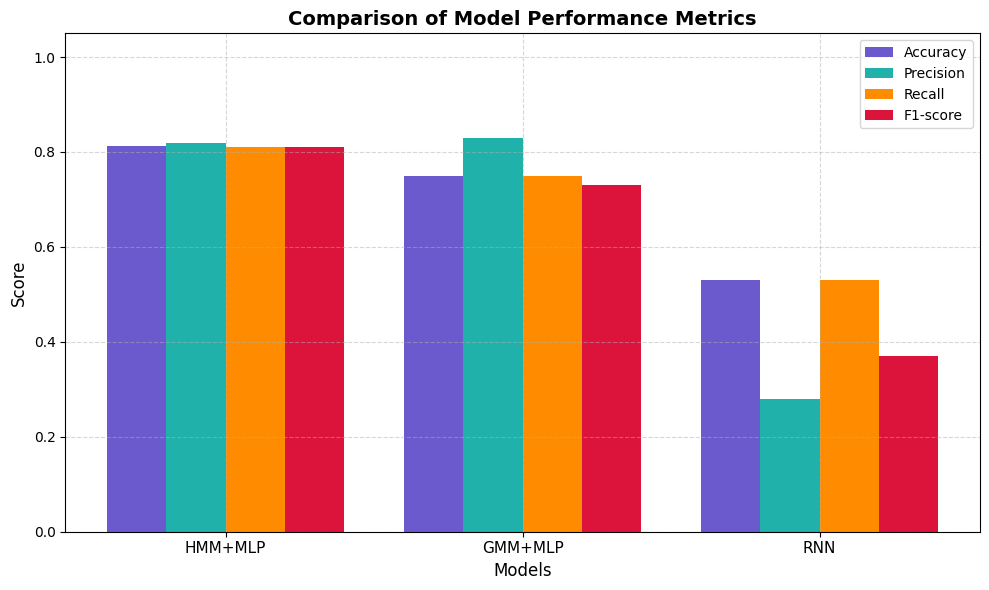

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names
models = ['HMM+MLP', 'GMM+MLP', 'RNN']

# Updated metrics from classification reports
accuracies = [0.8125, 0.7500, 0.5294]
precisions = [0.82, 0.83, 0.28]
recalls = [0.81, 0.75, 0.53]
f1_scores = [0.81, 0.73, 0.37]

# X-axis positions
x = np.arange(len(models))
width = 0.2  # Width of each bar

# Choose new, distinct colors
color_acc = '#6A5ACD'   # Slate Blue
color_prec = '#20B2AA'  # Light Sea Green
color_rec = '#FF8C00'   # Dark Orange
color_f1 = '#DC143C'    # Crimson

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x - 1.5 * width, accuracies, width, label='Accuracy', color=color_acc)
plt.bar(x - 0.5 * width, precisions, width, label='Precision', color=color_prec)
plt.bar(x + 0.5 * width, recalls, width, label='Recall', color=color_rec)
plt.bar(x + 1.5 * width, f1_scores, width, label='F1-score', color=color_f1)

# Labels and settings
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Comparison of Model Performance Metrics', fontsize=14, fontweight='bold')
plt.xticks(x, models, fontsize=11)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


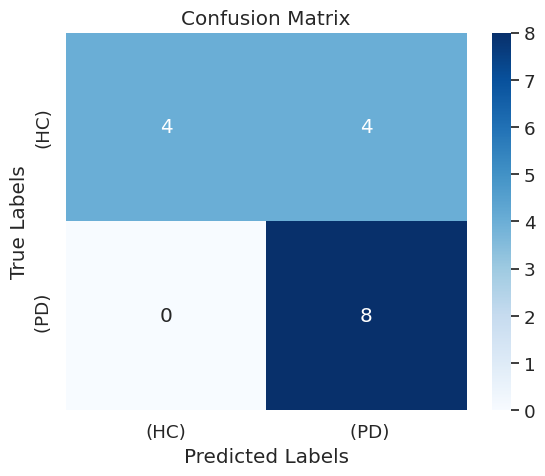

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the confusion matrix manually
cm = [[4, 4],
      [0, 8]]

# Define class names
class_names = ['(HC)', ' (PD)']

# Create the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()
